### Data processing ( BTC )

In [1]:
import pandas as pd
import os
from pathlib import Path
from typing import Union, List

def load_crypto_data(
    base_path: Union[str, Path],
    symbol: str = "BTCUSDT",
    year: str = "2022",
    freq: str = "1m"
) -> pd.DataFrame:
    """
    加載並合併特定交易對的所有每日CSV文件
    
    Args:
        base_path (str/Path): 數據文件的基礎路徑
        symbol (str): 交易對名稱，如 "BTCUSDT"
        year (str): 年份，如 "2022"
        freq (str): 頻率，如 "1m"
    
    Returns:
        pd.DataFrame: 合併後的DataFrame
    """
    # 確保base_path是Path對象
    base_path = Path(base_path)
    
    # 構建文件匹配模式
    pattern = f"{symbol}_{year}-*_{freq}.csv"
    
    # 獲取所有匹配的文件並排序
    csv_files = sorted(list(base_path.glob(pattern)))
    
    if not csv_files:
        raise ValueError(f"No files found matching pattern: {pattern}")
    
    # 讀取並合併所有CSV文件
    dfs = []
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            dfs.append(df)
        except Exception as e:
            print(f"Error reading file {file}: {e}")
    
    # 合併所有DataFrame
    if not dfs:
        raise ValueError("No data was successfully loaded")
    
    merged_df = pd.concat(dfs, ignore_index=True)
    
    # 確保時間列正確格式化
    merged_df['open_time'] = pd.to_datetime(merged_df['open_time'])
    merged_df['close_time'] = pd.to_datetime(merged_df['close_time'])
    
    # 按時間排序
    merged_df = merged_df.sort_values('open_time').reset_index(drop=True)
    
    # 檢查並移除重複數據
    merged_df = merged_df.drop_duplicates(subset=['open_time'], keep='first')
    
    return merged_df

def check_data_quality(df: pd.DataFrame) -> dict:
    """
    檢查合併後數據的質量
    
    Args:
        df (pd.DataFrame): 待檢查的DataFrame
    
    Returns:
        dict: 包含各種數據質量指標的字典
    """
    quality_report = {
        'total_rows': len(df),
        'date_range': (df['open_time'].min(), df['open_time'].max()),
        'missing_values': df.isnull().sum().to_dict(),
        'duplicate_times': len(df) - len(df['open_time'].unique()),
    }
    
    # 檢查時間間隔
    time_diffs = df['open_time'].diff().value_counts()
    quality_report['time_intervals'] = time_diffs
    
    return quality_report

# 使用示例


In [2]:
if __name__ == "__main__":
    # 假設數據路徑
    data_path = "/Users/mouyasushi/Desktop/crypto_strat/alpha/Quant-Training-Group-G/Alpha-Research/kline/binance/BTCUSDT/1m"
    
    # 加載數據
    btc_data = load_crypto_data(
        base_path=data_path,
        symbol="BTCUSDT",
        year="2022",
        freq="1m"
    )
    
    # 檢查數據質量
    quality_report = check_data_quality(btc_data)
    
    # 輸出基本信息
    print(f"Loaded data shape: {btc_data.shape}")
    print(f"Date range: {quality_report['date_range']}")
    print(f"Total rows: {quality_report['total_rows']}")

Loaded data shape: (518400, 12)
Date range: (Timestamp('2022-01-01 00:00:00'), Timestamp('2022-12-26 23:59:00'))
Total rows: 518400


In [3]:
btc_data

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2022-01-01 00:00:00,46216.93,46271.08,46208.37,46250.00,40.57574,2022-01-01 00:00:59.999,1.875978e+06,796,27.26086,1.260270e+06,0
1,2022-01-01 00:01:00,46250.00,46344.23,46234.39,46312.76,42.38106,2022-01-01 00:01:59.999,1.961908e+06,973,28.92522,1.339049e+06,0
2,2022-01-01 00:02:00,46312.76,46381.69,46292.75,46368.73,51.29955,2022-01-01 00:02:59.999,2.377414e+06,1238,22.74786,1.054135e+06,0
3,2022-01-01 00:03:00,46368.73,46391.49,46314.26,46331.08,30.45894,2022-01-01 00:03:59.999,1.412004e+06,953,16.12179,7.473086e+05,0
4,2022-01-01 00:04:00,46331.07,46336.10,46300.00,46321.34,20.96029,2022-01-01 00:04:59.999,9.710099e+05,591,11.49082,5.323199e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
518395,2022-12-26 23:55:00,16931.18,16944.52,16921.54,16925.79,493.19892,2022-12-26 23:55:59.999,8.352277e+06,10669,228.20326,3.864590e+06,0
518396,2022-12-26 23:56:00,16925.79,16939.41,16924.40,16927.61,308.61331,2022-12-26 23:56:59.999,5.225148e+06,6550,155.60933,2.634646e+06,0
518397,2022-12-26 23:57:00,16927.61,16928.43,16916.38,16920.85,166.23704,2022-12-26 23:57:59.999,2.813017e+06,4384,84.82348,1.435348e+06,0
518398,2022-12-26 23:58:00,16920.85,16921.10,16915.71,16918.79,76.21680,2022-12-26 23:58:59.999,1.289493e+06,2815,38.97172,6.593676e+05,0


### Data processing ( ALT ) : ETH 

In [4]:
if __name__ == "__main__":
    # 假設數據路徑
    data_path = "/Users/mouyasushi/Desktop/crypto_strat/alpha/Quant-Training-Group-G/Alpha-Research/kline/binance/ETHUSDT/1m"
    
    # 加載數據
    eth_data = load_crypto_data(
        base_path=data_path,
        symbol="ETHUSDT",
        year="2022",
        freq="1m"
    )
    
    # 檢查數據質量
    quality_report = check_data_quality(btc_data)
    
    # 輸出基本信息
    print(f"Loaded data shape: {btc_data.shape}")
    print(f"Date range: {quality_report['date_range']}")
    print(f"Total rows: {quality_report['total_rows']}")

Loaded data shape: (518400, 12)
Date range: (Timestamp('2022-01-01 00:00:00'), Timestamp('2022-12-26 23:59:00'))
Total rows: 518400


In [5]:
eth_data

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2022-01-01 00:00:00,3676.22,3687.05,3676.22,3684.84,504.3020,2022-01-01 00:00:59.999,1.856132e+06,749,271.3554,9.986197e+05,0
1,2022-01-01 00:01:00,3684.85,3694.20,3681.33,3691.55,273.0180,2022-01-01 00:01:59.999,1.006818e+06,580,181.6745,6.700959e+05,0
2,2022-01-01 00:02:00,3692.50,3694.42,3687.49,3693.62,216.0824,2022-01-01 00:02:59.999,7.976563e+05,460,80.1555,2.959250e+05,0
3,2022-01-01 00:03:00,3693.63,3695.41,3689.55,3690.58,250.2232,2022-01-01 00:03:59.999,9.237721e+05,448,109.0924,4.027651e+05,0
4,2022-01-01 00:04:00,3690.57,3691.03,3688.00,3690.09,119.8314,2022-01-01 00:04:59.999,4.421674e+05,279,55.1763,2.035886e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
518395,2022-12-26 23:55:00,1229.71,1231.09,1226.87,1227.81,1471.7586,2022-12-26 23:55:59.999,1.809334e+06,1407,816.9712,1.004298e+06,0
518396,2022-12-26 23:56:00,1227.81,1229.24,1227.81,1228.02,260.7216,2022-12-26 23:56:59.999,3.202682e+05,484,125.2568,1.538509e+05,0
518397,2022-12-26 23:57:00,1228.01,1228.02,1227.34,1227.63,141.5787,2022-12-26 23:57:59.999,1.738122e+05,286,62.6124,7.686638e+04,0
518398,2022-12-26 23:58:00,1227.63,1227.66,1227.63,1227.66,34.0023,2022-12-26 23:58:59.999,4.174255e+04,179,13.5774,1.666818e+04,0


Columns : 
- volume: 這個時間週期內的總交易量(以基礎貨幣計算)
- quote_asset_volume: 以報價貨幣計算的交易量
    - 例如: BTC/USDT交易對中,volume是以BTC計算,而quote_asset_volume則是以USDT計算的交易量
- number_of_trades: 在這個時間週期內發生的交易次數
- taker_buy_base_asset_volume: Taker(吃單方)買入基礎貨幣的數量
    - 例如: BTC/USDT中,這代表主動買入BTC的量
- taker_buy_quote_asset_volume: Taker買入時支付的報價貨幣數量
    - 例如: BTC/USDT中,這是買家支付的USDT總量

In [6]:

# 設置時間索引
btc_data.set_index('open_time', inplace=True)
eth_data.set_index('open_time', inplace=True)

# 排序數據
btc_data.sort_index(inplace=True)
eth_data.sort_index(inplace=True)




### First Model : 
R_{alt,t} = α + β₁Jump^{+}{BTC,t} + β₂Jump^{-}{BTC,t} + β₃RV_{BTC,t} + β₄R_{BTC,t} + ε_t
Where:

- R_{alt,t} is the log return of the altcoin at time t
- α is the intercept term
- Jump^{+}_{BTC,t} is the positive jump indicator (1 if positive jump, 0 otherwise) for Bitcoin at time t
- Jump^{-}_{BTC,t} is the negative jump indicator (1 if negative jump, 0 otherwise) for Bitcoin at time t
- RV_{BTC,t} is the realized volatility of Bitcoin at time t
- R_{BTC,t} is the log return of Bitcoin at time t
- ε_t is the error term at time t


In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


class JumpAnalyzer:
    def __init__(self, window_size: int = 60):  # change window size (one window = 1 min)
        self.window_size = window_size

    def process_crypto_data(self, df: pd.DataFrame) -> pd.DataFrame:
        """主要數據處理函數"""
        processed_df = df.copy()

        # 1. 計算log returns
        processed_df['log_return'] = np.log(processed_df['close']).diff()

        # 2. 計算realized volatility
        processed_df['rv'] = np.sqrt(
            (processed_df['log_return'] ** 2).rolling(
                window=self.window_size
            ).sum()
        )

        # 3. 使用滾動視窗計算百分位數並檢測跳躍
        def detect_jumps(x):
            if len(x) < self.window_size:  # 確保有足夠的數據
                return 0

            lower_threshold = np.percentile(x, 5)  # 第5百分位
            upper_threshold = np.percentile(x, 95)  # 第95百分位

            current_value = x.iloc[-1]
            if current_value <= lower_threshold:
                return -1  # 下跳躍
            elif current_value >= upper_threshold:
                return 1   # 上跳躍
            return 0

        processed_df['is_jump'] = processed_df['log_return'].rolling(
            window=self.window_size, 
            min_periods=self.window_size
        ).apply(detect_jumps, raw=False)

        # 填充開始的 NaN 值為 0
        processed_df['is_jump'] = processed_df['is_jump'].fillna(0)

        # 加入 is_positive_jump 和 is_negative_jump
        processed_df['is_positive_jump'] = (processed_df['is_jump'] == 1).astype(int)
        processed_df['is_negative_jump'] = (processed_df['is_jump'] == -1).astype(int)

        return processed_df

    def estimate_base_model(self, btc_df: pd.DataFrame, alt_df: pd.DataFrame):
        """估計基礎迴歸模型"""
        # 首先處理兩個數據集
        btc_processed = self.process_crypto_data(btc_df)
        alt_processed = self.process_crypto_data(alt_df)

        # 先重命名需要的欄位，避免合併後命名混淆
        btc_cols = {
            'log_return': 'log_return_btc',
            'rv': 'rv_btc',
            'is_positive_jump': 'is_positive_jump_btc',
            'is_negative_jump': 'is_negative_jump_btc'
        }
        alt_cols = {
            'log_return': 'log_return_alt'
        }

        btc_processed = btc_processed.rename(columns=btc_cols)
        alt_processed = alt_processed.rename(columns=alt_cols)

        # model_df: 合併BTC和Alt幣數據
        model_df = pd.merge(
            btc_processed[['log_return_btc', 'rv_btc', 'is_positive_jump_btc', 'is_negative_jump_btc']],
            alt_processed[['log_return_alt']],
            left_index=True,
            right_index=True
        )

        # 移除包含NaN的行
        model_df = model_df.dropna()

        # 準備模型變量
        Y = model_df['log_return_alt']
        X = sm.add_constant(pd.DataFrame({
            'btc_positive_jump': model_df['is_positive_jump_btc'],
            'btc_negative_jump': model_df['is_negative_jump_btc'],
            'btc_rv': model_df['rv_btc'],
            'btc_return': model_df['log_return_btc']
        }))

        # 估計模型
        model = sm.OLS(Y, X)
        results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 10})

        return results, model_df


In [18]:
analyzer = JumpAnalyzer(window_size=60)  # initialize the class 
model_results, model_df = analyzer.estimate_base_model(btc_data, eth_data)
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:         log_return_alt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                 2.911e+04
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:12:53   Log-Likelihood:             3.1222e+06
No. Observations:              518340   AIC:                        -6.244e+06
Df Residuals:                  518335   BIC:                        -6.244e+06
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.597e-06   2.21e-0

### analysis
- Durbin-Watson:2.067
    - approx no auto-corr 

- Jarque-Bera test p-value = 0：殘差不服從常態分配  -->  asymptotic method ( under law of large numbers )

- Condition Number = 1100：可能存在多重共線性問題  --> check for corr between inde variables 



- solving potential multicollinearity 

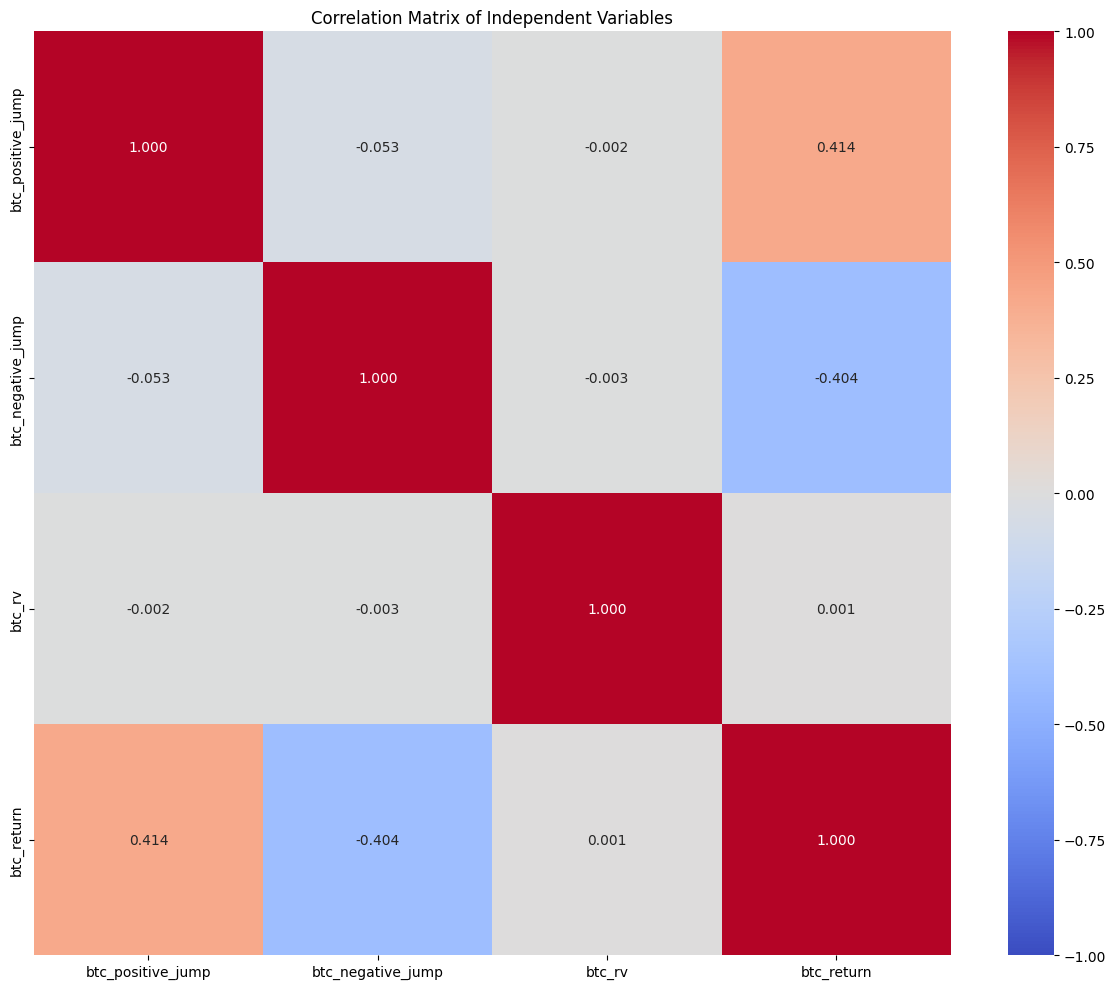


Variance Inflation Factors:
         Variable      VIF
            const 3.107204
btc_positive_jump 1.230591
btc_negative_jump 1.218380
           btc_rv 1.000017
       btc_return 1.466908

Correlation Matrix:
                   btc_positive_jump  btc_negative_jump  btc_rv  btc_return
btc_positive_jump             1.0000            -0.0535 -0.0022      0.4145
btc_negative_jump            -0.0535             1.0000 -0.0033     -0.4044
btc_rv                       -0.0022            -0.0033  1.0000      0.0010
btc_return                    0.4145            -0.4044  0.0010      1.0000


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def analyze_multicollinearity(model_df):
    """分析自變數之間的相關性和VIF"""
    
    # 準備自變數數據 - 現在包含正負跳躍
    X = pd.DataFrame({
        'btc_positive_jump': model_df['is_positive_jump_btc'],
        'btc_negative_jump': model_df['is_negative_jump_btc'],
        'btc_rv': model_df['rv_btc'],
        'btc_return': model_df['log_return_btc']
    })
    
    # 1. 計算相關係數矩陣
    corr_matrix = X.corr()
    
    # 繪製相關係數熱圖
    plt.figure(figsize=(12, 10))  # 稍微加大圖形尺寸以適應更多變量
    sns.heatmap(corr_matrix, 
                annot=True, 
                cmap='coolwarm', 
                vmin=-1, 
                vmax=1, 
                center=0,
                fmt='.3f')  # 增加小數點位數以提高精確度
    plt.title('Correlation Matrix of Independent Variables')
    plt.tight_layout()  # 確保標籤不會被切掉
    plt.show()
    
    # 2. 計算VIF
    X_with_const = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                       for i in range(X_with_const.shape[1])]
    
    # 格式化輸出
    print("\nVariance Inflation Factors:")
    print(vif_data.to_string(index=False))
    
    # 3. 打印相關係數矩陣
    print("\nCorrelation Matrix:")
    print(corr_matrix.round(4))  # 四捨五入到4位小數
    
    return corr_matrix, vif_data

# 使用方式:
analyzer = JumpAnalyzer(window_size=60)
results, model_df = analyzer.estimate_base_model(btc_data, eth_data)

# 分析多重共線性
corr_matrix, vif_data = analyze_multicollinearity(model_df)

- analysis
1. VIF all below 5 --> no potential multicollinearity 
2. Corr : all corr are extremely close to zero 

- conclusion : 
There might not be potential multicollinearity in my model 


### Problems : 解決 residual !~ Normal
Sol : 
1. --> RLM ( 對於處理極端值、非常態分配較為適當) --> 未解決 
2. --> 大樣本漸進性質 test --> 滿足漸進性質 


#### 1. RLM 

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM


class RobustJumpAnalyzer:
    def __init__(self, window_size: int = 40):  # change window size ( one window = 1 min )
        self.window_size = window_size
    
    def process_crypto_data(self, df: pd.DataFrame) -> pd.DataFrame:
        """主要數據處理函數"""
        processed_df = df.copy()
        
        # 1. 計算log returns
        processed_df['log_return'] = np.log(processed_df['close']).diff()

        # 2. 計算realized volatility
        processed_df['rv'] = np.sqrt(
            (processed_df['log_return']**2).rolling(
                window=self.window_size
            ).sum()
        )

        # 3. 使用滾動視窗計算百分位數並檢測跳躍
        def detect_jumps(x):
            """計算窗口內的極端值"""
            if len(x) < self.window_size:  # 確保有足夠的數據
                return 0
                
            lower_threshold = np.percentile(x, 5)  # 5th percentile
            upper_threshold = np.percentile(x, 95)  # 95th percentile
            
            # 檢查最新的值（最後一個值）是否超過閾值
            current_value = x.iloc[-1]
            if current_value <= lower_threshold:
                return -1  # 下跳躍
            elif current_value >= upper_threshold:
                return 1   # 上跳躍
            return 0

        # 使用滾動視窗檢測跳躍
        processed_df['is_jump'] = processed_df['log_return'].rolling(
            window=self.window_size, 
            min_periods=self.window_size
        ).apply(detect_jumps, raw=False)

        # 填充開始的 NaN 值為 0
        processed_df['is_jump'] = processed_df['is_jump'].fillna(0)

        # 加入 is_positive_jump 和 is_negative_jump
        processed_df['is_positive_jump'] = (processed_df['is_jump'] == 1).astype(int)
        processed_df['is_negative_jump'] = (processed_df['is_jump'] == -1).astype(int)

        return processed_df

    def estimate_robust_model(self, btc_df: pd.DataFrame, alt_df: pd.DataFrame):
        """估計穩健迴歸模型"""
        # 首先處理兩個數據集
        btc_processed = self.process_crypto_data(btc_df)
        alt_processed = self.process_crypto_data(alt_df)
        
        # 先重命名需要的欄位，避免合併後命名混淆
        btc_cols = {
            'log_return': 'log_return_btc',
            'rv': 'rv_btc',
            'is_positive_jump': 'is_positive_jump_btc',
            'is_negative_jump': 'is_negative_jump_btc'
        }
        alt_cols = {
            'log_return': 'log_return_alt'
        }
        
        btc_processed = btc_processed.rename(columns=btc_cols)
        alt_processed = alt_processed.rename(columns=alt_cols)
        
        # model_df: 合併BTC和Alt幣數據
        model_df = pd.merge(
            btc_processed[['log_return_btc', 'rv_btc', 'is_positive_jump_btc', 'is_negative_jump_btc']], 
            alt_processed[['log_return_alt']],
            left_index=True, 
            right_index=True
        )

        # 移除包含NaN的行
        model_df = model_df.dropna()

        # 準備模型變量
        Y = model_df['log_return_alt']
        X = sm.add_constant(pd.DataFrame({
            'btc_positive_jump': model_df['is_positive_jump_btc'],
            'btc_negative_jump': model_df['is_negative_jump_btc'],
            'btc_rv': model_df['rv_btc'],
            'btc_return': model_df['log_return_btc']
        }))

        # 估計穩健迴歸模型
        rlm_model = RLM(Y, X, M=sm.robust.norms.HuberT())
        results = rlm_model.fit()

        # 計算R平方 (因為RLM不直接提供)
        y_pred = results.predict(X)
        r_squared = 1 - (np.sum((Y - y_pred)**2) / np.sum((Y - np.mean(Y))**2))

        # 儲存R平方到結果中
        results.rsquared = r_squared

        return results, model_df

In [25]:
# 首先創建 RobustJumpAnalyzer 的實例
analyzer = RobustJumpAnalyzer(window_size= 1440)

# 然後使用實例的方法
model_results, model_df = analyzer.estimate_robust_model(btc_data, eth_data)


In [26]:
# 基本方式：打印摘要統計
print(model_results.summary())


# 查看我們計算的 R-squared
print(f"\nR-squared: {model_results.rsquared:.4f}")



                    Robust linear Model Regression Results                    
Dep. Variable:         log_return_alt   No. Observations:               516960
Model:                            RLM   Df Residuals:                   516955
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 12 Jan 2025                                         
Time:                        16:06:58                                         
No. Iterations:                    40                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.316e-07   1.27e-0

-  驗證殘差一樣非常態

In [27]:
# 從 RLM 結果中提取殘差
residuals = model_results.resid

# 計算 Jarque-Bera 統計量
import scipy.stats as stats
jb_stat, jb_p = stats.jarque_bera(residuals)

# 計算偏度和峰度
skew = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)

print(f"Jarque-Bera test: stat={jb_stat:.4f}, p={jb_p:.4e}")
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

Jarque-Bera test: stat=50663326.4059, p=0.0000e+00
Skewness: 0.3695
Kurtosis: 48.4924


#### 2. Asymptotic properties test 

1. 平穩性檢定：


ADF 檢定
KPSS 檢定
Phillips-Perron 檢定
確保殘差序列是平穩的


2. 序列相關性檢定：


ACF 分析
Q 統計量
檢查殘差是否存在序列相關


3. 大樣本性質檢定：


使用不同窗口大小檢查統計量的穩定性
觀察隨樣本量增加的漸進行為


4. 漸進正態性檢查：


基於中央極限定理
計算漸進信賴區間

In [31]:
from statsmodels.tsa.stattools import adfuller, acf, kpss
from arch.unitroot import PhillipsPerron

def check_asymptotic_properties(model_results, model_df):
    """檢查殘差的漸進性質，針對包含正負跳躍的模型"""
    
    residuals = model_results.resid
    
    # 1. 檢查平穩性
    def check_stationarity(series):
        """使用多個單位根檢定"""
        # ADF檢定
        adf_result = adfuller(series, regression='ct')
        
        # KPSS檢定
        kpss_result = kpss(series, regression='ct', nlags='auto')
        
        # Phillips-Perron檢定
        pp_test = PhillipsPerron(series)
        pp_result = pp_test.stat, pp_test.pvalue
        
        print("\n平穩性檢定結果：")
        print("===================")
        print(f"ADF Test:")
        print(f"  - Statistic: {adf_result[0]:.4f}")
        print(f"  - p-value: {adf_result[1]:.4f}")
        print(f"  - 結論: {'非平穩' if adf_result[1] > 0.05 else '平穩'}")
        
        print(f"\nKPSS Test:")
        print(f"  - Statistic: {kpss_result[0]:.4f}")
        print(f"  - p-value: {kpss_result[1]:.4f}")
        print(f"  - 結論: {'非平穩' if kpss_result[1] < 0.05 else '平穩'}")
        
        print(f"\nPhillips-Perron Test:")
        print(f"  - Statistic: {pp_result[0]:.4f}")
        print(f"  - p-value: {pp_result[1]:.4f}")
        print(f"  - 結論: {'非平穩' if pp_result[1] > 0.05 else '平穩'}")
        
        return adf_result, kpss_result, pp_result
    
    # 2. 檢查序列相關性
    def check_serial_correlation(series, lags=40):
        acf_values, q_stats, p_values = acf(series, nlags=lags, qstat=True)
        
        # 確保所有數組長度一致
        n = len(acf_values)
        lags = range(n)
        
        # 處理 Q統計量 和 p值 可能比 acf 少一個值的情況
        q_stats = np.append([0], q_stats)  # 第一個lag的Q統計量為0
        p_values = np.append([0], p_values)  # 第一個lag的p值為0
        
        # 創建DataFrame
        acf_df = pd.DataFrame({
            'Lag': lags,
            'ACF': acf_values,
            'Q-stat': q_stats[:n],  # 確保長度匹配
            'p-value': p_values[:n]  # 確保長度匹配
        })
        
        # 添加顯著性標記
        acf_df['Significance'] = acf_df['p-value'].apply(
            lambda x: '***' if x < 0.01 else ('**' if x < 0.05 else ('*' if x < 0.1 else ''))
        )
        
        return acf_df
    
    # 3. 檢查大樣本性質
    def check_sample_properties(series, window_sizes=[20, 40, 100, 200, 500, 1000]):
        """檢查不同樣本大小下的性質"""
        results = {}
        for size in window_sizes:
            # 計算滾動統計量
            rolling_mean = series.rolling(window=size).mean()
            rolling_std = series.rolling(window=size).std()
            rolling_skew = series.rolling(window=size).skew()
            rolling_kurt = series.rolling(window=size).kurt()
            
            # 計算跳躍特徵
            positive_jumps = (series > 2 * rolling_std).mean()
            negative_jumps = (series < -2 * rolling_std).mean()
            
            results[size] = {
                'mean': rolling_mean.mean(),
                'std': rolling_std.mean(),
                'skewness': rolling_skew.mean(),
                'kurtosis': rolling_kurt.mean(),
                'positive_jump_freq': positive_jumps,
                'negative_jump_freq': negative_jumps
            }
        
        return pd.DataFrame(results).T
    
    # 4. 漸進正態性檢查
    def check_asymptotic_normality(series):
        """檢查殘差是否滿足漸進正態性"""
        sample_size = len(series)
        mean = series.mean()
        std_error = series.std() / np.sqrt(sample_size)
        ci_lower = mean - 1.96 * std_error
        ci_upper = mean + 1.96 * std_error
        
        # 計算標準化殘差的偏度和峰度
        standardized_residuals = (series - mean) / series.std()
        skewness = standardized_residuals.skew()
        kurtosis = standardized_residuals.kurt()
        
        results = {
            'sample_size': sample_size,
            'mean': mean,
            'std_error': std_error,
            'confidence_interval': [ci_lower, ci_upper],
            'skewness': skewness,
            'kurtosis': kurtosis,
            'jarque_bera': stats.jarque_bera(standardized_residuals)
        }
        
        return results
    
    # 執行檢定
    print("1. 平穩性檢定")
    stationarity_results = check_stationarity(residuals)
    
    print("\n2. 序列相關性檢定")
    serial_corr_results = check_serial_correlation(residuals)
    print("自相關分析結果（前10階）：")
    print(serial_corr_results.head(10).to_string(index=False))
    
    print("\n3. 大樣本性質檢定")
    sample_properties = check_sample_properties(residuals)
    print("不同樣本大小下的統計特徵：")
    print(sample_properties.round(4))
    
    # 檢查漸進正態性
    normality_results = check_asymptotic_normality(residuals)
    print("\n4. 漸進正態性檢查：")
    print(f"樣本大小: {normality_results['sample_size']:,}")
    print(f"平均數: {normality_results['mean']:.6f}")
    print(f"標準誤: {normality_results['std_error']:.6f}")
    print(f"95% 漸進信賴區間: [{normality_results['confidence_interval'][0]:.6f}, {normality_results['confidence_interval'][1]:.6f}]")
    print(f"偏度: {normality_results['skewness']:.4f}")
    print(f"峰度: {normality_results['kurtosis']:.4f}")
    print(f"Jarque-Bera 檢定 - 統計量: {normality_results['jarque_bera'][0]:.4f}, p-value: {normality_results['jarque_bera'][1]:.4f}")
    
    return {
        'stationarity': stationarity_results,
        'serial_correlation': serial_corr_results,
        'sample_properties': sample_properties,
        'asymptotic_normality': normality_results
    }

In [32]:
# 在你的模型估計後
analyzer = JumpAnalyzer(window_size= 60)
results, model_df = analyzer.estimate_base_model(btc_data, eth_data)

# 檢查漸進性質
asymptotic_results = check_asymptotic_properties(results, model_df)

1. 平穩性檢定


/var/folders/kz/g7fm_pz11tv5kbttdpy6thc40000gn/T/ipykernel_90015/747634756.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='ct', nlags='auto')



平穩性檢定結果：
ADF Test:
  - Statistic: -73.4521
  - p-value: 0.0000
  - 結論: 平穩

KPSS Test:
  - Statistic: 0.0584
  - p-value: 0.1000
  - 結論: 平穩

Phillips-Perron Test:
  - Statistic: -747.1198
  - p-value: 0.0000
  - 結論: 平穩

2. 序列相關性檢定
自相關分析結果（前10階）：
 Lag       ACF     Q-stat       p-value Significance
   0  1.000000   0.000000  0.000000e+00          ***
   1 -0.033794 591.948279 9.443477e-131          ***
   2 -0.009441 638.147852 2.678889e-139          ***
   3 -0.006422 659.524139 1.254196e-142          ***
   4 -0.006531 681.634332 3.302018e-146          ***
   5  0.000047 681.635464 4.589832e-145          ***
   6 -0.002046 683.805353 1.918093e-144          ***
   7 -0.007326 711.622056 2.151591e-149          ***
   8 -0.001246 712.426235 1.510949e-148          ***
   9  0.000171 712.441368 1.462081e-147          ***

3. 大樣本性質檢定
不同樣本大小下的統計特徵：
      mean     std  skewness  kurtosis  positive_jump_freq  negative_jump_freq
20     0.0  0.0005    0.0110    0.9807              0.0284        

- conclusion

1. 考慮到大樣本（n=518,300），可以依賴漸進理論
    - 滿足平穩性
    - auto corr decay 快速
    - ~N(u, var), u --> 0 
2. t-test 和 F-test 在這種情況下仍然是可靠的，因為：

    - 樣本量很大
    - 殘差是平穩的
    - 平均數接近0

### Student t 
能更好地捕捉：

- 重尾特性
- 極端值的影響
- 非對稱性

![My Image](model_comparison.png)


In [48]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.regression.quantile_regression import QuantReg
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

class tJump:
    def __init__(self, window_size=40):
        self.window_size = window_size
    
    def calculate_realized_volatility(self, data):
        """計算已實現波動率"""
        returns = np.log(data['close']).diff()
        rv = np.sqrt((returns**2).rolling(window=self.window_size).sum())
        return rv
    
    def detect_jumps(self, data):
        """檢測價格跳躍，區分正負跳躍"""
        returns = np.log(data['close']).diff()
        
        # 初始化結果Series
        positive_jumps = pd.Series(0, index=returns.index)
        negative_jumps = pd.Series(0, index=returns.index)
        
        # 從window_size開始遍歷
        for i in range(self.window_size, len(returns)):
            window = returns.iloc[i-self.window_size:i]
            current_return = returns.iloc[i]
            
            # 計算閾值
            lower_threshold = np.percentile(window, 5)
            upper_threshold = np.percentile(window, 95)
            
            # 判斷跳躍
            if current_return >= upper_threshold:
                positive_jumps.iloc[i] = 1
            elif current_return <= lower_threshold:
                negative_jumps.iloc[i] = 1
                
        return positive_jumps, negative_jumps
    
    def prepare_data(self, btc_data, alt_data):
        """準備模型數據"""
        # 計算收益率
        btc_returns = np.log(btc_data['close']).diff()
        alt_returns = np.log(alt_data['close']).diff()
        
        # 計算已實現波動率
        btc_rv = self.calculate_realized_volatility(btc_data)
        
        # 檢測跳躍
        btc_pos_jumps, btc_neg_jumps = self.detect_jumps(btc_data)
        
        # 組合數據
        model_df = pd.DataFrame({
            'log_return_btc': btc_returns,
            'log_return_alt': alt_returns,
            'rv_btc': btc_rv,
            'is_positive_jump_btc': btc_pos_jumps,
            'is_negative_jump_btc': btc_neg_jumps
        })
        
        return model_df.dropna()
    
    def estimate_t_distribution_model(self, btc_data, alt_data):
        """使用t分布估計模型"""
        # 準備數據
        model_df = self.prepare_data(btc_data, alt_data)
        
        # 準備自變量和因變量
        X = sm.add_constant(model_df[[
            'is_positive_jump_btc',
            'is_negative_jump_btc',
            'rv_btc',
            'log_return_btc'
        ]])
        y = model_df['log_return_alt']
        
        # 定義t分布的對數似然函數
        def t_loglike(params):
            beta = params[:-2]
            sigma = np.exp(params[-2])
            df = np.exp(params[-1]) + 2
            
            resid = y - X.dot(beta)
            ll = np.sum(stats.t.logpdf(resid/sigma, df=df) - np.log(sigma))
            return -ll
        
        # 設定初始值
        init_model = sm.OLS(y, X).fit()
        initial_params = np.concatenate([
            init_model.params,
            [np.log(init_model.scale)],
            [np.log(5-2)]
        ])
        
        # 最小化負對數似然
        result = minimize(t_loglike, initial_params,
                        method='BFGS',
                        options={'gtol': 1e-8, 'maxiter': 1000})
        
        # 處理結果
        beta = result.x[:-2]
        sigma = np.exp(result.x[-2])
        df = np.exp(result.x[-1]) + 2
        
        # 計算擬合值和殘差
        fitted_values = X.dot(beta)
        residuals = y - fitted_values
        
        # 計算R平方
        r_squared = 1 - np.sum(residuals**2) / np.sum((y - y.mean())**2)
        
        # 計算標準誤（使用數值方法）
        eps = 1e-5
        n_params = len(result.x)
        hessian = np.zeros((n_params, n_params))
        
        for i in range(n_params):
            for j in range(i+1):
                params_ij = result.x.copy()
                params_ij[i] += eps
                params_ij[j] += eps
                
                params_i = result.x.copy()
                params_i[i] += eps
                
                params_j = result.x.copy()
                params_j[j] += eps
                
                fij = t_loglike(params_ij)
                fi = t_loglike(params_i)
                fj = t_loglike(params_j)
                f = t_loglike(result.x)
                
                hessian[i,j] = (fij - fi - fj + f) / (eps * eps)
                hessian[j,i] = hessian[i,j]
        
        try:
            cov = np.linalg.inv(hessian + np.eye(n_params) * 1e-6)
            std_errors = np.sqrt(np.maximum(np.diag(cov)[:len(beta)], 0))
        except:
            std_errors = np.full(len(beta), np.nan)
        
        # 計算t值和p值
        t_values = beta / std_errors
        p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=len(X)-len(beta)))
        
        # 整理結果
        results = {
            'params': beta,
            'std_errors': std_errors,
            't_values': t_values,
            'p_values': p_values,
            'sigma': sigma,
            'df': df,
            'r_squared': r_squared,
            'residuals': residuals,
            'fitted_values': fitted_values,
            'optimization_result': result
        }
        
        return results, model_df

In [49]:
# 初始化模型
analyzer = tJump(window_size=60)

# 估計模型
results, model_df = analyzer.estimate_t_distribution_model(btc_data, eth_data)

# 查看結果
print("Model Parameters:")
print("Coefficients:", results['params'])
print("Standard Errors:", results['std_errors'])
print("T-values:", results['t_values'])
print("P-values:", results['p_values'])
print("R-squared:", results['r_squared'])
print("Degrees of Freedom:", results['df'])

Model Parameters:
Coefficients: [-8.16904795e-07  1.09975879e-05  6.64758603e-06 -3.28849208e-04
  1.14034206e+00]
Standard Errors: [1.02061007e-06 2.86976215e-06 2.84723762e-06 1.78984289e-04
 1.13402811e-03]
T-values: [-8.00408322e-01  3.83222975e+00  2.33474930e+00 -1.83730768e+00
  1.00556772e+03]
P-values: [4.23474628e-01 1.27002034e-04 1.95569010e-02 6.61650595e-02
 0.00000000e+00]
R-squared: 0.7609427009202225
Degrees of Freedom: 2.4856558765388708


In [50]:
print(results.summary())

AttributeError: 'dict' object has no attribute 'summary'

#### analysis 
- R平方 = 0.761:

模型解釋了約76.1%的alt coin收益率變異
與原始模型的擬合度相當


- Student-t自由度 = 2.486:

    - 非常低的自由度（<3）表示數據確實存在嚴重的重尾特性
    - 驗證了使用Student-t分布的必要性
    - 自由度接近2表示尾部風險非常高



- 與原始模型的比較

參數估計的變化:

    - BTC收益率係數略微降低（從1.145降至1.141）
    - 跳躍效應變為負向（原本為正）
    - 波動率效應變得更加顯著


- 標準誤的改進:

t分布模型提供了更保守的標準誤估計
考慮了重尾風險



- 實務意義

投資策略含義:

    - BTC的正向影響仍然顯著（係數>1表示槓桿效應）
    - 需要特別注意BTC的跳躍和波動率風險
    - alt coin在BTC劇烈波動時可能面臨較大風險




### Data EDA 

### Make sure y ( eth_return) isn't auto-correlated 

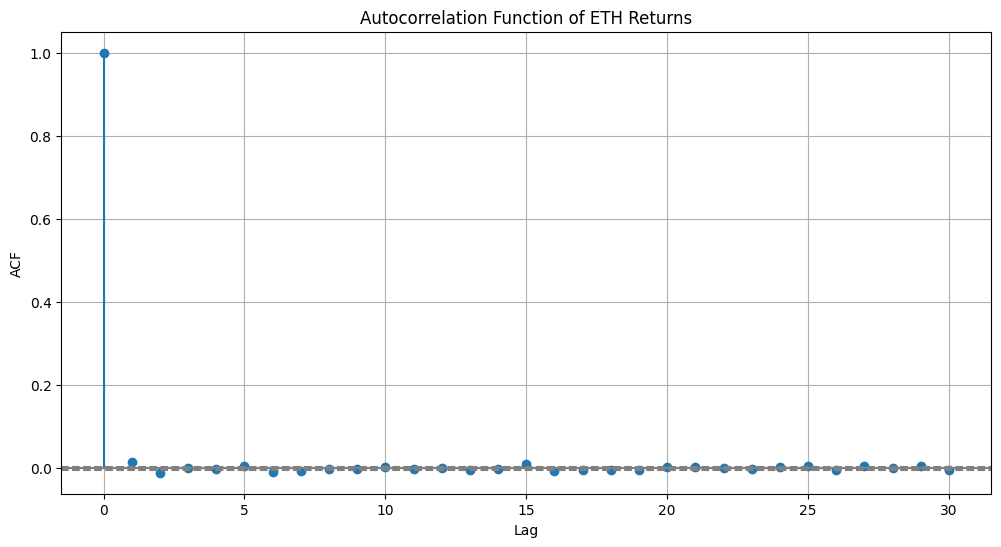


ACF values:
Lag 0: 1.0000
Lag 1: 0.0150
Lag 2: -0.0104
Lag 3: 0.0019
Lag 4: -0.0011
Lag 5: 0.0046
Lag 6: -0.0088
Lag 7: -0.0068
Lag 8: -0.0017
Lag 9: -0.0011
Lag 10: 0.0035
Lag 11: -0.0013
Lag 12: 0.0014
Lag 13: -0.0029
Lag 14: -0.0004
Lag 15: 0.0104
Lag 16: -0.0068
Lag 17: -0.0027
Lag 18: -0.0034
Lag 19: -0.0049
Lag 20: 0.0041
Lag 21: 0.0045
Lag 22: 0.0003
Lag 23: -0.0013
Lag 24: 0.0030
Lag 25: 0.0066
Lag 26: -0.0035
Lag 27: 0.0049
Lag 28: 0.0003
Lag 29: 0.0049
Lag 30: -0.0041


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

def plot_return_acf(eth_processed, max_lag=30):
    """
    計算並繪製ETH收益率的ACF圖
    
    Parameters:
    -----------
    eth_processed : DataFrame
        ETH數據
    max_lag : int
        最大要測試的lag值
    """
    # 計算log return
    eth_returns = np.log(eth_processed['close']).diff().dropna()
    
    # 計算ACF
    acf_values = acf(eth_returns, nlags=max_lag)
    
    # 繪製ACF圖
    plt.figure(figsize=(12, 6))
    plt.stem(range(len(acf_values)), acf_values)
    plt.axhline(y=0, linestyle='-', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(eth_returns)), linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(eth_returns)), linestyle='--', color='gray')
    plt.title('Autocorrelation Function of ETH Returns')
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.grid(True)
    plt.show()
    
    return acf_values

# 使用函數
acf_values = plot_return_acf(eth_data, max_lag=30)

# 打印具體的ACF值
print("\nACF values:")
for lag, value in enumerate(acf_values):
    print(f"Lag {lag}: {value:.4f}")

# Second Model : lagging effect
```
R_{alt,t} = α + Σᵢ₌₀³(β₁ᵢJump⁺_{BTC,t-i} + β₂ᵢJump⁻_{BTC,t-i} + β₃ᵢR_{BTC,t-i}) + ε_t
其中：
- R_{alt,t} 是 altcoin (ETH) 在t時期的收益率
- Jump⁺_{BTC,t-i} 是 BTC 在 t-i 時期的正向跳躍指標
- Jump⁻_{BTC,t-i} 是 BTC 在 t-i 時期的負向跳躍指標
- R_{BTC,t-i} 是 BTC 在 t-i 時期的收益率
- i = 0,1,2,3 代表從當期到三期滯後
- ε_t 是誤差項

```
時間軸：... t-60 t-59 ... t-3 t-2 t-1 t
                 |__________________|  使用window=60計算t時刻的指標
                          |  lag_3
                             |  lag_2
                                |  lag_1
                                   |  當期值
```

In [31]:
class LaggedRobustJumpAnalyzer:
    def __init__(self, window_size: int = 40, max_lag: int = 3):  
        self.window_size = window_size
        self.max_lag = max_lag
    
    def process_crypto_data(self, df: pd.DataFrame) -> pd.DataFrame:
        """主要數據處理函數"""
        processed_df = df.copy()
        
        # 1. 計算log returns
        processed_df['log_return'] = np.log(processed_df['close']).diff()

        # 2. 計算realized volatility
        processed_df['rv'] = np.sqrt(
            (processed_df['log_return']**2).rolling(
                window=self.window_size
            ).sum()
        )

        # 3. 使用滾動視窗計算百分位數檢測跳躍
        def detect_jumps(x):
            if len(x) < self.window_size:
                return 0
            lower_threshold = np.percentile(x, 1)
            upper_threshold = np.percentile(x, 99)
            current_value = x.iloc[-1]
            if current_value <= lower_threshold or current_value >= upper_threshold:
                return 1
            return 0

        processed_df['is_jump'] = processed_df['log_return'].rolling(
            window=self.window_size, 
            min_periods=self.window_size
        ).apply(detect_jumps, raw=False)

        processed_df['is_jump'] = processed_df['is_jump'].fillna(0)
        return processed_df

    def create_lagged_features(self, df: pd.DataFrame, columns: list, max_lag: int):
        """為指定列創建滯後特徵"""
        lagged_df = df.copy()
        
        for col in columns:
            for i in range(1, max_lag + 1):
                lagged_df[f'{col}_lag_{i}'] = df[col].shift(i)
                
        return lagged_df

    def estimate_robust_model(self, btc_df: pd.DataFrame, alt_df: pd.DataFrame):
        """估計包含滯後項的穩健迴歸模型"""
        # 處理數據
        btc_processed = self.process_crypto_data(btc_df)
        alt_processed = self.process_crypto_data(alt_df)
        
        # 重命名列
        btc_cols = {
            'log_return': 'log_return_btc',
            'rv': 'rv_btc',
            'is_jump': 'is_jump_btc'
        }
        alt_cols = {
            'log_return': 'log_return_alt'
        }
        
        btc_processed = btc_processed.rename(columns=btc_cols)
        alt_processed = alt_processed.rename(columns=alt_cols)
        
        # 創建滯後特徵
        lagged_features = ['log_return_btc', 'rv_btc', 'is_jump_btc']
        btc_processed = self.create_lagged_features(btc_processed, lagged_features, self.max_lag)
        
        # 合併數據
        model_df = pd.merge(
            btc_processed,
            alt_processed[['log_return_alt']],
            left_index=True, 
            right_index=True
        )
        
        # 移除NaN
        model_df = model_df.dropna()

        # 準備變量
        Y = model_df['log_return_alt']
        
        # 構建包含當期和滯後項的X矩陣
        X_cols = []
        for var in ['btc_jump', 'btc_rv', 'btc_return']:
            # 當期值
            if var == 'btc_jump':
                X_cols.append('is_jump_btc')
            elif var == 'btc_rv':
                X_cols.append('rv_btc')
            else:
                X_cols.append('log_return_btc')
            
            # 滯後項
            for i in range(1, self.max_lag + 1):
                if var == 'btc_jump':
                    X_cols.append(f'is_jump_btc_lag_{i}')
                elif var == 'btc_rv':
                    X_cols.append(f'rv_btc_lag_{i}')
                else:
                    X_cols.append(f'log_return_btc_lag_{i}')

        X = model_df[X_cols].copy()
        X = sm.add_constant(X)

        # 估計模型
        rlm_model = RLM(Y, X, M=sm.robust.norms.HuberT())
        results = rlm_model.fit()

        # 計算R平方
        y_pred = results.predict(X)
        r_squared = 1 - (np.sum((Y - y_pred)**2) / np.sum((Y - np.mean(Y))**2))
        results.rsquared = r_squared

        return results, model_df

In [32]:
analyzer = LaggedRobustJumpAnalyzer(window_size=60, max_lag=5)  # window = 100, lag = 3 

results, model_df = analyzer.estimate_robust_model(btc_data, eth_data)

print(results.summary())
print(f"\nR-squared: {results.rsquared:.4f}")

                    Robust linear Model Regression Results                    
Dep. Variable:         log_return_alt   No. Observations:               518335
Model:                            RLM   Df Residuals:                   518316
Method:                          IRLS   Df Model:                           18
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 07 Jan 2025                                         
Time:                        08:52:49                                         
No. Iterations:                    48                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.358e-07 

- analysis 
1. rv : 有較長期的影響 ( rv_lag3 pvalue 才顯著 )
2. log_return : all sig 
3. jump : all lag term not sig 

- importance : 
1. 收益率（最重要）
2. 波動率（次要）
3. 跳躍（最小）

- potential profitability : 
1. log_return: decay when lag goes up 
    - 定量比較：
        - t-1 影響是 t 的 0.51% (0.0059/1.1450)
        - t-2 影響是 t 的 0.20% (0.0023/1.1450)
        - t-3 影響是 t 的 0.15% (0.0017/1.1450)
        總影響 = 1.1450 + 0.0059 + 0.0023 + 0.0017 = 1.1549
        - 當期佔比 = 1.1450/1.1549 = 99.14%
        - conclusion : --> 市場非常有效率，價格資訊在一分鐘內就大部分被吸收

2. rv 
    - analysis
        - 當期 (t):   -0.0071 (p=0.006) *顯著
        - 滯後1 (t-1):  0.0056 (p=0.158) 不顯著
        - 滯後2 (t-2):  0.0070 (p=0.078) 邊際顯著
        - 滯後3 (t-3): -0.0057 (p=0.029) *顯著
        - 波動率的影響模式更複雜, 沒有明顯的衰減趨勢, 有符號反轉（正負交替）
        - conclusion : 動率衝擊會引起市場的多期調整, 市場似乎有某種"波動率平衡機制", 需要觀察更長期間來完全理解波動率的影響

3. jump 
    - analysis
        - BTC的跳躍對ETH的影響是即時的
        - 不需要太擔心跳躍的延遲效應
        - 相比波動率和收益率，跳躍的影響最小
        - 跳躍可能更適合用於風險管理而非預測

#### pos_jump, neg_jump & log R 

In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM

class LaggedJumpAnalyzer:
    def __init__(self, window_size: int = 40, max_lag: int = 3):  
        self.window_size = window_size
        self.max_lag = max_lag
    
    def process_crypto_data(self, df: pd.DataFrame) -> pd.DataFrame:
        """主要數據處理函數"""
        processed_df = df.copy()
        
        # 1. 計算log returns
        processed_df['log_return'] = np.log(processed_df['close']).diff()

        # 2. 使用滾動視窗計算百分位數並檢測跳躍
        def detect_jumps(x):
            if len(x) < self.window_size:
                return 0, 0
            
            lower_threshold = np.percentile(x, 5)
            upper_threshold = np.percentile(x, 95)
            current_value = x.iloc[-1]
            
            positive_jump = 1 if current_value >= upper_threshold else 0
            negative_jump = 1 if current_value <= lower_threshold else 0
            
            return positive_jump, negative_jump

        # 初始化跳躍列
        processed_df['is_positive_jump'] = 0
        processed_df['is_negative_jump'] = 0
        
        # 使用滾動窗口檢測跳躍
        for i in range(self.window_size, len(processed_df)):
            window = processed_df['log_return'].iloc[i-self.window_size:i]
            current_value = processed_df['log_return'].iloc[i]
            
            lower_threshold = np.percentile(window, 5)
            upper_threshold = np.percentile(window, 95)
            
            if current_value >= upper_threshold:
                processed_df.loc[processed_df.index[i], 'is_positive_jump'] = 1
            elif current_value <= lower_threshold:
                processed_df.loc[processed_df.index[i], 'is_negative_jump'] = 1

        return processed_df

    def create_lagged_features(self, df: pd.DataFrame, columns: list, max_lag: int):
        """為指定列創建滯後特徵"""
        lagged_df = df.copy()
        
        for col in columns:
            for i in range(1, max_lag + 1):
                lagged_df[f'{col}_lag_{i}'] = df[col].shift(i)
                
        return lagged_df

    def estimate_robust_model(self, btc_df: pd.DataFrame, alt_df: pd.DataFrame):
        """估計包含滯後項的穩健迴歸模型"""
        # 處理數據
        btc_processed = self.process_crypto_data(btc_df)
        alt_processed = self.process_crypto_data(alt_df)
        
        # 重命名列
        btc_cols = {
            'log_return': 'log_return_btc',
            'is_positive_jump': 'is_positive_jump_btc',
            'is_negative_jump': 'is_negative_jump_btc'
        }
        alt_cols = {
            'log_return': 'log_return_alt'
        }
        
        btc_processed = btc_processed.rename(columns=btc_cols)
        alt_processed = alt_processed.rename(columns=alt_cols)
        
        # 創建滯後特徵
        lagged_features = [
            'log_return_btc',
            'is_positive_jump_btc',
            'is_negative_jump_btc'
        ]
        btc_processed = self.create_lagged_features(btc_processed, lagged_features, self.max_lag)
        
        # 合併數據
        model_df = pd.merge(
            btc_processed,
            alt_processed[['log_return_alt']],
            left_index=True, 
            right_index=True
        )
        
        # 移除NaN
        model_df = model_df.dropna()

        # 準備變量
        Y = model_df['log_return_alt']
        
        # 構建包含當期和滯後項的X矩陣
        X_cols = [
            'is_positive_jump_btc',
            'is_negative_jump_btc',
            'log_return_btc'
        ]
        
        # 添加滯後項
        for i in range(1, self.max_lag + 1):
            X_cols.extend([
                f'is_positive_jump_btc_lag_{i}',
                f'is_negative_jump_btc_lag_{i}',
                f'log_return_btc_lag_{i}'
            ])

        X = model_df[X_cols].copy()
        X = sm.add_constant(X)

        # 估計模型
        rlm_model = RLM(Y, X, M=sm.robust.norms.HuberT())
        results = rlm_model.fit()

        # 計算R平方
        y_pred = results.predict(X)
        r_squared = 1 - (np.sum((Y - y_pred)**2) / np.sum((Y - np.mean(Y))**2))
        results.rsquared = r_squared

        return results, model_df

In [41]:
# 初始化模型
analyzer = LaggedJumpAnalyzer(window_size=60, max_lag=3)

# 估計模型
results, model_df = analyzer.estimate_robust_model(btc_data, eth_data)

# 查看結果
print("Model Parameters:")
print("Coefficients:", results.params)
print("Standard Errors:", results.bse)
print("T-values:", results.tvalues)
print("P-values:", results.pvalues)
print("R-squared:", results.rsquared)

Model Parameters:
Coefficients: const                        -3.289297e-06
is_positive_jump_btc          2.000417e-05
is_negative_jump_btc          6.576593e-07
log_return_btc                1.142346e+00
is_positive_jump_btc_lag_1    1.380133e-05
is_negative_jump_btc_lag_1   -7.482064e-06
log_return_btc_lag_1          2.909727e-03
is_positive_jump_btc_lag_2   -3.698064e-06
is_negative_jump_btc_lag_2    9.030679e-06
log_return_btc_lag_2          4.231406e-03
is_positive_jump_btc_lag_3   -2.610698e-06
is_negative_jump_btc_lag_3    8.750197e-06
log_return_btc_lag_3          3.463586e-03
dtype: float64
Standard Errors: const                         6.810274e-07
is_positive_jump_btc          2.567910e-06
is_negative_jump_btc          2.551148e-06
log_return_btc                7.626585e-04
is_positive_jump_btc_lag_1    2.570509e-06
is_negative_jump_btc_lag_1    2.555061e-06
log_return_btc_lag_1          7.626790e-04
is_positive_jump_btc_lag_2    2.569924e-06
is_negative_jump_btc_lag_2    2.5

In [46]:
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:         log_return_alt   No. Observations:               518396
Model:                            RLM   Df Residuals:                   518383
Method:                          IRLS   Df Model:                           12
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 12 Jan 2025                                         
Time:                        18:18:56                                         
No. Iterations:                    50                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [51]:
# 初始化模型
analyzer = LaggedJumpAnalyzer(window_size=60, max_lag= 8)

# 估計模型
results, model_df = analyzer.estimate_robust_model(btc_data, eth_data)

# 查看結果
print("Model Parameters:")
print("Coefficients:", results.params)
print("Standard Errors:", results.bse)
print("T-values:", results.tvalues)
print("P-values:", results.pvalues)
print("R-squared:", results.rsquared)

Model Parameters:
Coefficients: const                        -3.190053e-06
is_positive_jump_btc          2.020658e-05
is_negative_jump_btc          6.720417e-07
log_return_btc                1.142526e+00
is_positive_jump_btc_lag_1    1.398988e-05
is_negative_jump_btc_lag_1   -7.586689e-06
log_return_btc_lag_1          2.982801e-03
is_positive_jump_btc_lag_2   -3.426772e-06
is_negative_jump_btc_lag_2    8.910424e-06
log_return_btc_lag_2          4.213187e-03
is_positive_jump_btc_lag_3   -2.347195e-06
is_negative_jump_btc_lag_3    8.658075e-06
log_return_btc_lag_3          3.458610e-03
is_positive_jump_btc_lag_4   -2.626159e-06
is_negative_jump_btc_lag_4    3.167093e-06
log_return_btc_lag_4          1.822413e-03
is_positive_jump_btc_lag_5   -2.999000e-06
is_negative_jump_btc_lag_5   -9.631772e-07
log_return_btc_lag_5         -1.126972e-03
is_positive_jump_btc_lag_6   -5.653762e-06
is_negative_jump_btc_lag_6    4.937915e-06
log_return_btc_lag_6          1.387732e-03
is_positive_jump_btc_l

# Third Modle : Complex modeling 
- to use all the columns and multiplying features to see if we have greater result 
- conclusion : we discover new sig feature, and we will incorporate those in the final model 

In [34]:
# 基礎數據處理和科學計算
import numpy as np
import pandas as pd

# 統計模型
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.regression.quantile_regression import QuantReg
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch

# 優化和統計分布
from scipy import stats
from scipy.optimize import minimize

# 視覺化
import matplotlib.pyplot as plt
import seaborn as sns

class EnhancedMarketMicrostructureModel:
   def __init__(self, window_size=40):
       self.window_size = window_size
       
   def calculate_rv(self, df):
       """計算已實現波動率"""
       returns = np.log(df['close']).diff()
       rv = returns.rolling(window=self.window_size).std()
       return rv
   
   def detect_jumps(self, df):
       """檢測價格跳躍"""
       returns = np.log(df['close']).diff()
       rolling_std = returns.rolling(window=self.window_size).std()
       jumps = (abs(returns) > 3 * rolling_std).astype(int)
       return jumps
       
   def calculate_market_features(self, df):
       """計算市場微觀結構特徵"""
       # 基礎指標
       df['log_return'] = np.log(df['close']).diff()
       df['rv'] = self.calculate_rv(df)
       df['is_jump'] = self.detect_jumps(df)
       
       # 標準化交易量
       df['normalized_volume'] = (df['volume'] - df['volume'].rolling(window=self.window_size).mean()) / \
                                df['volume'].rolling(window=self.window_size).std()
       
       # 市場微觀結構指標
       df['order_imbalance'] = (df['taker_buy_base_asset_volume'] - 
                              (df['volume'] - df['taker_buy_base_asset_volume'])) / df['volume']
       
       df['illiquidity'] = abs(df['log_return']) / (df['quote_asset_volume'] + 1e-10)  # 避免除以0
       
       df['effective_spread'] = 2 * abs(df['close'] - (df['high'] + df['low'])/2) / df['close']
       
       # 交易強度
       df['trade_intensity'] = df['number_of_trades'] / (df['volume'] + 1e-10)
       
       # 價格衝擊
       df['price_impact'] = abs(df['log_return']) / (df['volume'] + 1e-10)
       
       # 交互項
       df['jump_rv_interact'] = df['is_jump'] * df['rv']
       df['volume_rv_interact'] = df['normalized_volume'] * df['rv']
       df['jump_volume_interact'] = df['is_jump'] * df['normalized_volume']
       
       return df

   def prepare_model_data(self, btc_df, alt_df):
       """準備模型數據"""
       # 處理BTC數據
       btc_processed = self.calculate_market_features(btc_df.copy())
       
       # 處理alt coin數據
       alt_processed = alt_df.copy()
       alt_processed['log_return_alt'] = np.log(alt_processed['close']).diff()
       
       # 重命名BTC列以避免混淆
       columns_mapping = {
           'log_return': 'log_return_btc',
           'rv': 'rv_btc',
           'is_jump': 'is_jump_btc',
           'normalized_volume': 'normalized_volume_btc',
           'order_imbalance': 'order_imbalance_btc',
           'illiquidity': 'illiquidity_btc',
           'effective_spread': 'effective_spread_btc',
           'trade_intensity': 'trade_intensity_btc',
           'price_impact': 'price_impact_btc',
           'jump_rv_interact': 'jump_rv_interact_btc',
           'volume_rv_interact': 'volume_rv_interact_btc',
           'jump_volume_interact': 'jump_volume_interact_btc'
       }
       btc_processed = btc_processed.rename(columns=columns_mapping)
       
       # 合併數據
       model_df = pd.merge(
           btc_processed,
           alt_processed[['log_return_alt']],
           left_index=True,
           right_index=True
       )
       
       return model_df.dropna()

   def estimate_models(self, model_df):
       """估計不同規格的模型"""
       # 定義不同的模型規格
       feature_sets = {
           'base_model': ['is_jump_btc', 'rv_btc', 'log_return_btc', 'normalized_volume_btc'],
           
           'market_microstructure': [
               'is_jump_btc', 'rv_btc', 'log_return_btc', 'normalized_volume_btc',
               'order_imbalance_btc', 'illiquidity_btc', 'effective_spread_btc'
           ],
           
           'interaction_model': [
               'is_jump_btc', 'rv_btc', 'log_return_btc', 'normalized_volume_btc',
               'jump_rv_interact_btc', 'volume_rv_interact_btc', 'jump_volume_interact_btc'
           ],
           
           'full_model': [
               'is_jump_btc', 'rv_btc', 'log_return_btc', 'normalized_volume_btc',
               'order_imbalance_btc', 'illiquidity_btc', 'effective_spread_btc',
               'jump_rv_interact_btc', 'volume_rv_interact_btc', 'jump_volume_interact_btc'
           ]
       }
       
       results = {}
       for name, features in feature_sets.items():
            # 準備數據
            X = sm.add_constant(model_df[features])
            y = model_df['log_return_alt']
            
            # 估計模型
            model = RLM(y, X, M=sm.robust.norms.HuberT())
            fit_result = model.fit()
            
            # 計算R平方
            y_pred = fit_result.predict(X)
            r_squared = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))
            
            # 計算AIC和BIC
            n = len(y)
            k = len(features) + 1  # 加1是因為常數項
            residuals = y - y_pred
            sigma2 = np.sum(residuals**2) / n
            log_likelihood = -n/2 * (1 + np.log(2*np.pi) + np.log(sigma2))
            
            aic = 2*k - 2*log_likelihood
            bic = np.log(n)*k - 2*log_likelihood
            
            # 儲存結果
            fit_result.rsquared = r_squared
            fit_result.aic = aic
            fit_result.bic = bic
            results[name] = fit_result
       return results

   def compare_models(self, results):
       """比較不同模型的結果"""
       comparison = pd.DataFrame()
       
       for name, result in results.items():
           # 獲取基本統計量
           stats_df = pd.DataFrame({
               'Model': name,
               'R-squared': result.rsquared,
               'AIC': result.aic if hasattr(result, 'aic') else None,
               'BIC': result.bic if hasattr(result, 'bic') else None,
           }, index=[0])
           
           comparison = pd.concat([comparison, stats_df], ignore_index=True)
       
       return comparison



In [35]:

# 初始化模型
model = EnhancedMarketMicrostructureModel(window_size=200)

# 準備數據
model_df = model.prepare_model_data(btc_data, eth_data)

# 估計模型
results = model.estimate_models(model_df)

# 比較模型
comparison = model.compare_models(results)
print("\nModel Comparison:")
print(comparison)

# 查看具體模型結果
for name, result in results.items():
   print(f"\n{name} Results:")
   print(result.summary())



Model Comparison:
                   Model  R-squared           AIC           BIC
0             base_model   0.760934 -6.242447e+06 -6.242391e+06
1  market_microstructure   0.761110 -6.242822e+06 -6.242733e+06
2      interaction_model   0.760949 -6.242473e+06 -6.242384e+06
3             full_model   0.761117 -6.242831e+06 -6.242709e+06

base_model Results:
                    Robust linear Model Regression Results                    
Dep. Variable:         log_return_alt   No. Observations:               518200
Model:                            RLM   Df Residuals:                   518195
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 07 Jan 2025                                         
Time:   

# Final Model 
parameters: 
- log return
- rv_btc 
- is_jump
- order_imbalance 
- effective spread 


In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from scipy.optimize import minimize

class SimplifiedTModel:
   def __init__(self, window_size=40):
       self.window_size = window_size
       
   def prepare_data(self, btc_data, alt_data):
       """準備基礎數據"""
       # 處理BTC數據
       btc_processed = pd.DataFrame()
       
       # 計算收益率
       btc_processed['log_return_btc'] = np.log(btc_data['close']).diff()
       
       # 計算波動率
       btc_processed['rv_btc'] = btc_processed['log_return_btc'].rolling(
           window=self.window_size).std()
       
       # 檢測跳躍
       rolling_std = btc_processed['log_return_btc'].rolling(
           window=self.window_size).std()
       btc_processed['is_jump_btc'] = (
           abs(btc_processed['log_return_btc']) > 3 * rolling_std
       ).astype(int)
       
       # 計算訂單失衡
       btc_processed['order_imbalance_btc'] = (
           btc_data['taker_buy_base_asset_volume'] - 
           (btc_data['volume'] - btc_data['taker_buy_base_asset_volume'])
       ) / btc_data['volume']
       
       # 計算有效價差
       btc_processed['effective_spread_btc'] = (
           2 * abs(btc_data['close'] - (btc_data['high'] + btc_data['low'])/2)
           / btc_data['close']
       )
       
       # 處理alt coin數據
       alt_processed = pd.DataFrame()
       alt_processed['log_return_alt'] = np.log(alt_data['close']).diff()
       
       # 合併數據
       model_df = pd.merge(
           btc_processed,
           alt_processed,
           left_index=True,
           right_index=True
       )
       
       return model_df.dropna()

   def estimate_t_distribution_model(self, btc_data, alt_data):
       """使用Student-t分布估計模型"""
       # 準備數據
       model_df = self.prepare_data(btc_data, alt_data)
       
       # 設置變量
       key_features = [
           'log_return_btc',
           'rv_btc',
           'is_jump_btc',
           'order_imbalance_btc',
           'effective_spread_btc'
       ]
       
       X = sm.add_constant(model_df[key_features])
       y = model_df['log_return_alt']
       
       # Student-t MLE估計
       def t_loglike(params):
           beta = params[:-2]
           sigma = np.exp(params[-2])
           df = np.exp(params[-1]) + 2
           
           resid = y - X.dot(beta)
           ll = np.sum(stats.t.logpdf(resid/sigma, df=df) - np.log(sigma))
           return -ll
       
       # 初始值
       init_model = sm.OLS(y, X).fit()
       initial_params = np.concatenate([
           init_model.params,
           [np.log(init_model.scale)],
           [np.log(5-2)]
       ])
       
       # 最大似然估計
       result = minimize(t_loglike, initial_params, 
                       method='BFGS',
                       options={'gtol': 1e-8, 'maxiter': 1000})
       
       return self.process_results(result, X, y)

   def process_results(self, opt_result, X, y):
       """處理估計結果"""
       # 提取參數
       beta = opt_result.x[:-2]
       sigma = np.exp(opt_result.x[-2])
       df = np.exp(opt_result.x[-1]) + 2
       
       # 計算擬合值和殘差
       fitted_values = X.dot(beta)
       residuals = y - fitted_values
       
       # 計算R平方
       r_squared = 1 - np.sum(residuals**2) / np.sum((y - y.mean())**2)
       
       # 計算標準誤和t值
       n_params = len(opt_result.x)
       eps = 1e-4
       
       # 改進的Hessian計算
       def hessian(params):
           hess = np.zeros((n_params, n_params))
           for i in range(n_params):
               for j in range(i+1):
                   params_ij = params.copy()
                   params_ij[i] += eps
                   params_ij[j] += eps
                   
                   params_i = params.copy()
                   params_i[i] += eps
                   
                   params_j = params.copy()
                   params_j[j] += eps
                   
                   fij = t_loglike_wrapper(params_ij)
                   fi = t_loglike_wrapper(params_i)
                   fj = t_loglike_wrapper(params_j)
                   f = t_loglike_wrapper(params)
                   
                   hess[i,j] = (fij - fi - fj + f) / (eps * eps)
                   hess[j,i] = hess[i,j]
           
           return hess + np.eye(n_params) * 1e-6
       
       def t_loglike_wrapper(params):
           beta = params[:-2]
           sigma = np.exp(params[-2])
           df = np.exp(params[-1]) + 2
           
           resid = y - X.dot(beta)
           return -np.sum(stats.t.logpdf(resid/sigma, df=df) - np.log(sigma))
       
       # 計算標準誤
       H = hessian(opt_result.x)
       try:
           cov = np.linalg.inv(H)
           std_errors = np.sqrt(np.maximum(np.diag(cov)[:len(beta)], 0))
       except:
           std_errors = np.full(len(beta), np.nan)
       
       # 計算t值和p值
       t_values = beta / std_errors
       p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=len(X)-len(beta)))
       
       # 計算AIC和BIC
       n = len(y)
       k = len(beta)
       log_likelihood = -opt_result.fun
       aic = 2*k - 2*log_likelihood
       bic = np.log(n)*k - 2*log_likelihood
       
       # 整理結果
       results = {
           'params': beta,
           'std_errors': std_errors,
           't_values': t_values,
           'p_values': p_values,
           'sigma': sigma,
           'df': df,
           'r_squared': r_squared,
           'aic': aic,
           'bic': bic,
           'residuals': residuals,
           'fitted_values': fitted_values
       }
       
       return results



Model Parameters:
--------------------------------------------------
Parameter            Coefficient  Std Error    t-value      p-value     
--------------------------------------------------
const                   -0.000000     0.000001    -0.039776     0.968272
log_return_btc           1.135137     0.001042  1089.421516     0.000000
rv_btc                  -0.003621     0.001718    -2.107711     0.035056
is_jump_btc             -0.000030     0.000009    -3.397508     0.000680
order_imbalance_btc      0.000030     0.000002    13.515073     0.000000
effective_spread_btc     0.002503     0.001393     1.796847     0.072361

Model Statistics:
R-squared: 0.761048
Student-t df: 2.487535
AIC: -6472773.041478
BIC: -6472706.090927


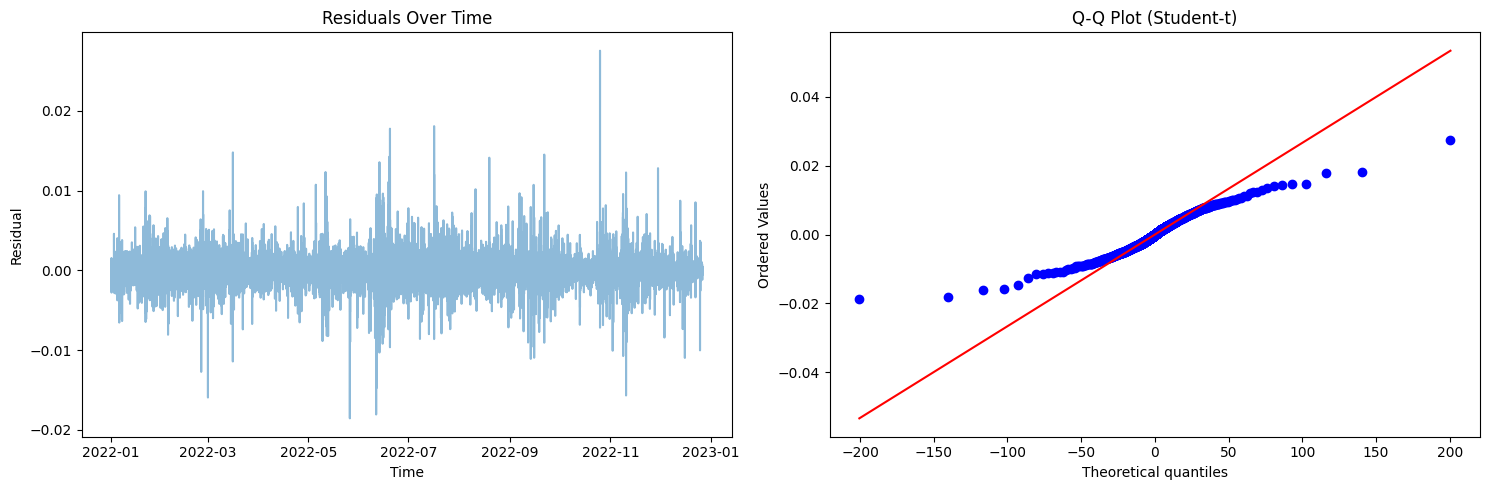

In [37]:
# 1. First, initialize the model
model = SimplifiedTModel(window_size=40)

# 2. Fit the model with your data
results = model.estimate_t_distribution_model(btc_data, eth_data)

# 3. Print results
print("Model Parameters:")
print("-" * 50)
print(f"{'Parameter':<20} {'Coefficient':<12} {'Std Error':<12} {'t-value':<12} {'p-value':<12}")
print("-" * 50)

param_names = ['const', 'log_return_btc', 'rv_btc', 'is_jump_btc', 
               'order_imbalance_btc', 'effective_spread_btc']

for i, name in enumerate(param_names):
    print(f"{name:<20} {results['params'][i]:12.6f} {results['std_errors'][i]:12.6f} "
          f"{results['t_values'][i]:12.6f} {results['p_values'][i]:12.6f}")

print("\nModel Statistics:")
print(f"R-squared: {results['r_squared']:.6f}")
print(f"Student-t df: {results['df']:.6f}")
print(f"AIC: {results['aic']:.6f}")
print(f"BIC: {results['bic']:.6f}")

# 4. Optional: Plot residuals analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Residuals plot
plt.subplot(121)
plt.plot(results['residuals'], alpha=0.5)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residual')

# QQ plot
plt.subplot(122)
from scipy import stats
stats.probplot(results['residuals'], dist="t", sparams=(results['df'],), plot=plt)
plt.title('Q-Q Plot (Student-t)')

plt.tight_layout()
plt.show()

# 5. Get fitted values for predictions
fitted_values = results['fitted_values']

### Revised 
Model : 
'''
R_{alt,t} = α + Σᵢ₌₀³(β₁ᵢJump⁺_{BTC,t-i} + β₂ᵢJump⁻_{BTC,t-i} + β₃ᵢR_{BTC,t-i}) + γ₁OI_{BTC,t} + γ₂ES_{BTC,t} + ε_t
'''
其中：
-  R_{alt,t} 是 altcoin (ETH) 在t時期的收益率
- Jump⁺_{BTC,t-i} 是 BTC 在 t-i 時期的正向跳躍指標 (95th percentile)
- Jump⁻_{BTC,t-i} 是 BTC 在 t-i 時期的負向跳躍指標 (5th percentile)
- R_{BTC,t-i} 是 BTC 在 t-i 時期的收益率
OI_{BTC,t} 是 BTC 在 t 時期的訂單失衡 (Order Imbalance)
	- 計算方法：
	order_imbalance = (
    	btc_data['taker_buy_base_asset_volume'] - 
    	(btc_data['volume'] - btc_data['taker_buy_base_asset_volume'])
	) / btc_data['volume']
ES_{BTC,t} 是 BTC 在 t 時期的有效價差 (Effective Spread)
	- 計算方法：
	
- i = 0,1,2,3 代表從當期到三期滯後
- ε_t ~ t(0, σ², v) 是服從自由度為v的t分布的誤差項



In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from scipy.optimize import minimize

class ImprovedTModel:
    def __init__(self, window_size=40, max_lag=3):
        self.window_size = window_size
        self.max_lag = max_lag
    
    def detect_jumps(self, returns):
        """使用百分位數檢測正負跳躍"""
        positive_jumps = pd.Series(0, index=returns.index)
        negative_jumps = pd.Series(0, index=returns.index)
        
        for i in range(self.window_size, len(returns)):
            window = returns.iloc[i-self.window_size:i]
            current_return = returns.iloc[i]
            
            upper_threshold = np.percentile(window, 95)
            lower_threshold = np.percentile(window, 5)
            
            if current_return >= upper_threshold:
                positive_jumps.iloc[i] = 1
            elif current_return <= lower_threshold:
                negative_jumps.iloc[i] = 1
                
        return positive_jumps, negative_jumps

    def create_lagged_features(self, df, columns):
        """創建滯後特徵"""
        lagged_df = df.copy()
        for col in columns:
            for i in range(1, self.max_lag + 1):
                lagged_df[f'{col}_lag_{i}'] = df[col].shift(i)
        return lagged_df
    
    def prepare_data(self, btc_data, alt_data):
        """準備模型數據"""
        # 基礎數據處理
        btc_returns = np.log(btc_data['close']).diff()
        alt_returns = np.log(alt_data['close']).diff()
        
        # 檢測跳躍
        pos_jumps, neg_jumps = self.detect_jumps(btc_returns)
        
        # 計算其他市場微觀結構變量
        order_imbalance = (
            btc_data['taker_buy_base_asset_volume'] - 
            (btc_data['volume'] - btc_data['taker_buy_base_asset_volume'])
        ) / btc_data['volume']
        
        effective_spread = (
            2 * abs(btc_data['close'] - (btc_data['high'] + btc_data['low'])/2)
            / btc_data['close']
        )
        
        # 創建基礎DataFrame
        model_df = pd.DataFrame({
            'log_return_alt': alt_returns,
            'log_return_btc': btc_returns,
            'is_positive_jump_btc': pos_jumps,
            'is_negative_jump_btc': neg_jumps,
            'order_imbalance_btc': order_imbalance,
            'effective_spread_btc': effective_spread
        })
        
        # 創建滯後特徵
        lag_columns = ['log_return_btc', 'is_positive_jump_btc', 'is_negative_jump_btc']
        model_df = self.create_lagged_features(model_df, lag_columns)
        
        return model_df.dropna()
    
    def estimate_t_distribution_model(self, btc_data, alt_data):
        """使用t分布估計模型"""
        model_df = self.prepare_data(btc_data, alt_data)
        
        # 準備變量
        base_features = [
            'is_positive_jump_btc', 
            'is_negative_jump_btc',
            'log_return_btc',
            'order_imbalance_btc',
            'effective_spread_btc'
        ]
        
        # 添加滯後項
        lag_features = []
        for i in range(1, self.max_lag + 1):
            lag_features.extend([
                f'is_positive_jump_btc_lag_{i}',
                f'is_negative_jump_btc_lag_{i}',
                f'log_return_btc_lag_{i}'
            ])
        
        all_features = base_features + lag_features
        X = sm.add_constant(model_df[all_features])
        y = model_df['log_return_alt']
        
        # t分布MLE估計
        def t_loglike(params):
            beta = params[:-2]
            sigma = np.exp(params[-2])
            df = np.exp(params[-1]) + 2
            
            resid = y - X.dot(beta)
            ll = np.sum(stats.t.logpdf(resid/sigma, df=df) - np.log(sigma))
            return -ll
        
        # 初始值設定
        init_model = sm.OLS(y, X).fit()
        initial_params = np.concatenate([
            init_model.params,
            [np.log(init_model.scale)],
            [np.log(5-2)]
        ])
        
        # 最佳化
        result = minimize(t_loglike, initial_params,
                        method='BFGS',
                        options={'gtol': 1e-8, 'maxiter': 1000})
        
        return self.process_results(result, X, y)

    def process_results(self, opt_result, X, y):
       beta = opt_result.x[:-2]
       sigma = np.exp(opt_result.x[-2])
       df = np.exp(opt_result.x[-1]) + 2
       
       # 計算擬合值和殘差
       fitted_values = X.dot(beta)
       residuals = y - fitted_values
       
       # 計算R平方
       r_squared = 1 - np.sum(residuals**2) / np.sum((y - y.mean())**2)
       
       # 計算標準誤和t值
       n_params = len(opt_result.x)
       eps = 1e-4
       
       # 改進的Hessian計算
       def hessian(params):
           hess = np.zeros((n_params, n_params))
           for i in range(n_params):
               for j in range(i+1):
                   params_ij = params.copy()
                   params_ij[i] += eps
                   params_ij[j] += eps
                   
                   params_i = params.copy()
                   params_i[i] += eps
                   
                   params_j = params.copy()
                   params_j[j] += eps
                   
                   fij = t_loglike_wrapper(params_ij)
                   fi = t_loglike_wrapper(params_i)
                   fj = t_loglike_wrapper(params_j)
                   f = t_loglike_wrapper(params)
                   
                   hess[i,j] = (fij - fi - fj + f) / (eps * eps)
                   hess[j,i] = hess[i,j]
           
           return hess + np.eye(n_params) * 1e-6
       
       def t_loglike_wrapper(params):
           beta = params[:-2]
           sigma = np.exp(params[-2])
           df = np.exp(params[-1]) + 2
           
           resid = y - X.dot(beta)
           return -np.sum(stats.t.logpdf(resid/sigma, df=df) - np.log(sigma))
       
       # 計算標準誤
       H = hessian(opt_result.x)
       try:
           cov = np.linalg.inv(H)
           std_errors = np.sqrt(np.maximum(np.diag(cov)[:len(beta)], 0))
       except:
           std_errors = np.full(len(beta), np.nan)
       
       # 計算t值和p值
       t_values = beta / std_errors
       p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=len(X)-len(beta)))
       
       # 計算AIC和BIC
       n = len(y)
       k = len(beta)
       log_likelihood = -opt_result.fun
       aic = 2*k - 2*log_likelihood
       bic = np.log(n)*k - 2*log_likelihood
       
       # 整理結果
       results = {
           'params': beta,
           'std_errors': std_errors,
           't_values': t_values,
           'p_values': p_values,
           'sigma': sigma,
           'df': df,
           'r_squared': r_squared,
           'aic': aic,
           'bic': bic,
           'residuals': residuals,
           'fitted_values': fitted_values
       }
       
       return results



In [54]:
model = ImprovedTModel(window_size=60, max_lag=3)
results = model.estimate_t_distribution_model(btc_data, eth_data)

In [60]:
def display_model_results(results, max_lag=3):
    """
    顯示t分布模型的結果
    
    Parameters:
    -----------
    results : dict
        模型估計結果的字典
    max_lag : int
        最大滯後期數
    """
    import matplotlib.pyplot as plt
    from scipy import stats
    
    # 1. 定義基本特徵和滯後特徵名稱
    base_features = [
        'const',
        'is_positive_jump_btc',
        'is_negative_jump_btc',
        'log_return_btc',
        'order_imbalance_btc',
        'effective_spread_btc'
    ]
    
    lag_features = []
    for i in range(1, max_lag + 1):
        lag_features.extend([
            f'is_positive_jump_btc_lag_{i}',
            f'is_negative_jump_btc_lag_{i}',
            f'log_return_btc_lag_{i}'
        ])
    
    param_names = base_features + lag_features

    # 2. 打印參數估計結果
    print("Model Parameters:")
    print("-" * 80)
    print(f"{'Parameter':<25} {'Coefficient':<12} {'Std Error':<12} {'t-value':<12} {'p-value':<12}")
    print("-" * 80)

    for i, name in enumerate(param_names):
        print(f"{name:<25} {results['params'][i]:12.6f} {results['std_errors'][i]:12.6f} "
              f"{results['t_values'][i]:12.6f} {results['p_values'][i]:12.6f}")

    # 3. 打印模型統計量
    print("\nModel Statistics:")
    print("-" * 40)
    print(f"R-squared: {results['r_squared']:.6f}")
    print(f"Student-t df: {results['df']:.6f}")
    print(f"AIC: {results['aic']:.6f}")
    print(f"BIC: {results['bic']:.6f}")

    # 4. 繪製診斷圖
    plt.figure(figsize=(15, 5))

    # 殘差圖
    plt.subplot(121)
    plt.plot(results['residuals'], alpha=0.5, color='steelblue')
    plt.title('Residuals Over Time')
    plt.xlabel('Time')
    plt.ylabel('Residual')
    plt.grid(True, alpha=0.3)

    # QQ圖
    plt.subplot(122)
    stats.probplot(results['residuals'], 
                  dist="t", 
                  sparams=(results['df'],), 
                  plot=plt,
                  fit=True)
    plt.title('Q-Q Plot (Student-t)')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    
    return results['fitted_values']

Model Parameters:
--------------------------------------------------------------------------------
Parameter                 Coefficient  Std Error    t-value      p-value     
--------------------------------------------------------------------------------
const                        -0.000002     0.000001    -2.517886     0.011806
is_positive_jump_btc          0.000011     0.000003     3.539278     0.000401
is_negative_jump_btc          0.000009     0.000003     2.942015     0.003261
log_return_btc                1.135195     0.001213   935.731186     0.000000
order_imbalance_btc           0.000030     0.000002    13.408102     0.000000
effective_spread_btc         -0.002233     0.001331    -1.677805     0.093386
is_positive_jump_btc_lag_1     0.000016     0.000003     5.759543     0.000000
is_negative_jump_btc_lag_1    -0.000010     0.000003    -3.695928     0.000219
log_return_btc_lag_1          0.000469     0.001058     0.443488     0.657413
is_positive_jump_btc_lag_2    -0.00000

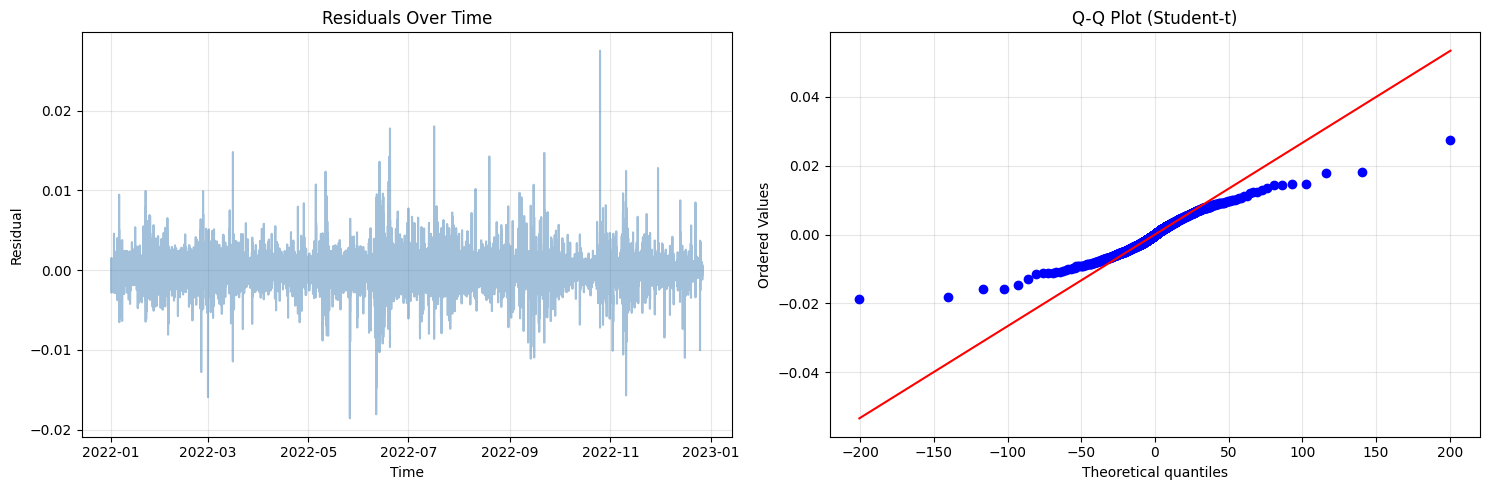

In [61]:

# 顯示結果
fitted_values = display_model_results(results, max_lag=3)

# Market Micro Structure 

In [90]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from scipy.optimize import minimize

class SimplifiedMicrostructureModel:
    def __init__(self, window_size=40, max_lag=3):
        self.window_size = window_size
        self.max_lag = max_lag

    def calculate_metrics(self, data):
        """计算市场微观结构指标"""
        vwap = data['quote_asset_volume'] / data['volume']
        taker_price = data['taker_buy_quote_asset_volume'] / data['taker_buy_base_asset_volume']
        price_impact = taker_price - vwap
        taker_premium = (taker_price / vwap) - 1
        
        return pd.DataFrame({
            'price_impact': price_impact,
            'taker_premium': taker_premium
        })
    
    def create_lags(self, df, columns):
        """创建滞后特征"""
        lagged_df = df.copy()
        for col in columns:
            for i in range(1, self.max_lag + 1):
                lagged_df[f'{col}_lag_{i}'] = df[col].shift(i)
        return lagged_df
    
    def prepare_data(self, btc_data, alt_data):
        """准备模型数据"""
        btc_returns = np.log(btc_data['close']).diff()
        alt_returns = np.log(alt_data['close']).diff()
        
        micro_metrics = self.calculate_metrics(btc_data)
        
        model_df = pd.DataFrame({
            'log_return_alt': alt_returns,
            'log_return_btc': btc_returns,
            'price_impact_btc': micro_metrics['price_impact'],
            'taker_premium_btc': micro_metrics['taker_premium']
        })
        
        lag_columns = [
            'log_return_btc',
            'price_impact_btc',
            'taker_premium_btc'
        ]
        model_df = self.create_lags(model_df, lag_columns)
        
        return model_df.dropna()
    
    def t_loglike(self, params, X, y):
        """计算 t 分布的负对数似然函数"""
        beta = params[:-2]
        sigma = np.exp(params[-2])
        df = np.exp(params[-1]) + 2
        
        resid = y - X.dot(beta)
        ll = stats.t.logpdf(resid / sigma, df=df) - np.log(sigma)
        
        if np.any(np.isnan(ll)) or np.any(np.isinf(ll)):
            return np.inf  # 防止异常值
        
        return -np.sum(ll)
    
    def estimate_model(self, btc_data, alt_data):
        """使用 t 分布估计模型"""
        model_df = self.prepare_data(btc_data, alt_data)
        
        base_features = [
            'log_return_btc',
            'price_impact_btc',
            'taker_premium_btc'
        ]
        lag_features = []
        for i in range(1, self.max_lag + 1):
            for feat in base_features:
                lag_features.append(f'{feat}_lag_{i}')
        
        all_features = base_features + lag_features
        X = sm.add_constant(model_df[all_features])
        y = model_df['log_return_alt']
        
        init_model = sm.OLS(y, X).fit()
        initial_params = np.concatenate([
            init_model.params,
            [np.log(init_model.scale)],
            [np.log(5 - 2)]
        ])
        
        result = minimize(
            self.t_loglike,
            initial_params,
            args=(X, y),
            method='BFGS',
            options={'gtol': 1e-8, 'maxiter': 1000}
        )
        
        return self.process_results(result, X, y)
    
    def process_results(self, opt_result, X, y):
        """处理估计结果"""
        beta = opt_result.x[:-2]
        sigma = np.exp(opt_result.x[-2])
        df = np.exp(opt_result.x[-1]) + 2
        
        fitted_values = X.dot(beta)
        residuals = y - fitted_values
        r_squared = 1 - np.sum(residuals**2) / np.sum((y - y.mean())**2)
        
        n_params = len(opt_result.x)
        eps = 1e-4
        
        def hessian(params):
            H = np.zeros((n_params, n_params))
            for i in range(n_params):
                for j in range(i + 1):
                    params_ij = params.copy()
                    params_ij[i] += eps
                    params_ij[j] += eps
                    
                    params_i = params.copy()
                    params_i[i] += eps
                    
                    params_j = params.copy()
                    params_j[j] += eps
                    
                    fij = self.t_loglike(params_ij, X, y)
                    fi = self.t_loglike(params_i, X, y)
                    fj = self.t_loglike(params_j, X, y)
                    f = self.t_loglike(params, X, y)
                    
                    H[i, j] = (fij - fi - fj + f) / (eps * eps)
                    H[j, i] = H[i, j]
            
            return H + np.eye(n_params) * 1e-6
        
        H = hessian(opt_result.x)
        try:
            cov = np.linalg.inv(H)
            std_errors = np.sqrt(np.maximum(np.diag(cov)[:len(beta)], 0))
        except:
            std_errors = np.full(len(beta), np.nan)
        
        t_values = beta / std_errors
        p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=len(X) - len(beta)))
        
        n = len(y)
        k = len(beta)
        log_likelihood = -opt_result.fun
        aic = 2 * k - 2 * log_likelihood
        bic = np.log(n) * k - 2 * log_likelihood
        
        return {
            'params': beta,
            'std_errors': std_errors,
            't_values': t_values,
            'p_values': p_values,
            'sigma': sigma,
            'df': df,
            'r_squared': r_squared,
            'aic': aic,
            'bic': bic,
            'residuals': residuals,
            'fitted_values': fitted_values
        }


In [91]:
def display_microstructure_results(results, max_lag=3):
   """
   顯示市場微觀結構模型的t分布估計結果
   """
   import matplotlib.pyplot as plt
   from scipy import stats
   
   # 先檢查實際參數數量
   n_params = len(results['params'])
   
   # 基本特徵
   base_features = [
       'const',
       'log_return_btc',
       'price_impact_btc',
       'taker_premium_btc',
       'maker_taker_spread_btc'
   ]
   
   # 創建滯後特徵名稱
   lag_features = []
   for i in range(1, max_lag + 1):
       lag_features.extend([
           f'log_return_btc_lag_{i}',
           f'price_impact_btc_lag_{i}',
           f'taker_premium_btc_lag_{i}',
           f'maker_taker_spread_btc_lag_{i}'
       ])
   
   param_names = base_features + lag_features
   
   # 確保參數名稱數量匹配
   param_names = param_names[:n_params]

   # 打印參數估計結果
   print("Market Microstructure Model Results:")
   print("="*80)
   print(f"{'Parameter':<30} {'Coefficient':<12} {'Std Error':<12} {'t-value':<12} {'p-value':<12}")
   print("-"*80)

   for i in range(n_params):
       name = param_names[i] if i < len(param_names) else f'param_{i}'
       coef = results['params'][i]
       std_err = results['std_errors'][i]
       t_val = results['t_values'][i]
       p_val = results['p_values'][i]
       
       # 添加顯著性標記
       stars = ''
       if p_val < 0.01:
           stars = '***'
       elif p_val < 0.05:
           stars = '**'
       elif p_val < 0.1:
           stars = '*'
           
       print(f"{name:<30} {coef:12.6f} {std_err:12.6f} {t_val:12.6f} {p_val:12.6f} {stars}")

   # 打印模型統計量
   print("\nModel Statistics:")
   print("="*40)
   print(f"Number of Parameters: {n_params}")
   print(f"R-squared: {results['r_squared']:.6f}")
   print(f"Student-t df: {results['df']:.6f}")
   print(f"AIC: {results['aic']:.6f}")
   print(f"BIC: {results['bic']:.6f}")

   # 繪製診斷圖
   plt.figure(figsize=(15, 5))

   # 殘差圖
   plt.subplot(121)
   plt.plot(results['residuals'], alpha=0.5, color='steelblue')
   plt.title('Residuals Over Time')
   plt.xlabel('Time')
   plt.ylabel('Residual')
   plt.grid(True, alpha=0.3)

   # QQ圖
   plt.subplot(122)
   stats.probplot(results['residuals'], 
                 dist="t", 
                 sparams=(results['df'],), 
                 plot=plt,
                 fit=True)
   plt.title('Q-Q Plot (Student-t)')
   plt.grid(True, alpha=0.3)

   plt.tight_layout()
   plt.show()

   # 打印解釋性說明
   print("\nSignificance levels:")
   print("*** : p < 0.01")
   print("**  : p < 0.05")
   print("*   : p < 0.10")
   
   return results['fitted_values']

/var/folders/kz/g7fm_pz11tv5kbttdpy6thc40000gn/T/ipykernel_90015/2068120387.py:148: RuntimeWarning: divide by zero encountered in divide
  t_values = beta / std_errors


Market Microstructure Model Results:
Parameter                      Coefficient  Std Error    t-value      p-value     
--------------------------------------------------------------------------------
const                             -0.000002     0.000001    -4.192169     0.000028 ***
log_return_btc                     1.141615     0.000940  1214.806178     0.000000 ***
price_impact_btc                  -0.000003     0.000000         -inf     0.000000 ***
taker_premium_btc                  0.053388     0.000000          inf     0.000000 ***
maker_taker_spread_btc             0.004612     0.000845     5.461432     0.000000 ***
log_return_btc_lag_1              -0.000001     0.000000         -inf     0.000000 ***
price_impact_btc_lag_1             0.032669     0.000000          inf     0.000000 ***
taker_premium_btc_lag_1            0.001187     0.000799     1.484502     0.137676 
maker_taker_spread_btc_lag_1       0.000000     0.000000          inf     0.000000 ***
log_return_btc_lag_

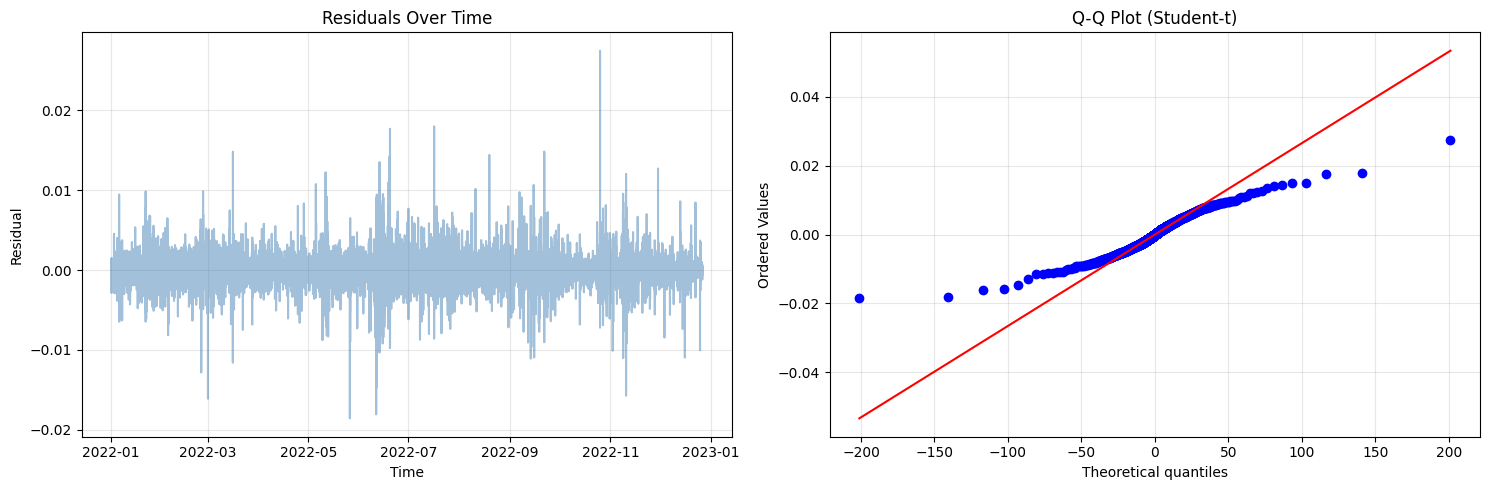


Significance levels:
*** : p < 0.01
**  : p < 0.05
*   : p < 0.10


In [92]:
# 初始化模型
model = SimplifiedMicrostructureModel(window_size=60, max_lag=3)

# 估計模型
results = model.estimate_model(btc_data, eth_data)

# 顯示結果
fitted_values = display_microstructure_results(results, max_lag=3)

# Problem 
- 有沒有可能是市場出現行情 --> 兩者return 一起受到的影響？
    

#### Granger causality test 

In [93]:
from statsmodels.tsa.stattools import grangercausalitytests

# Preprocess BTC and altcoin data to calculate log returns
btc_data['log_return'] = np.log(btc_data['close']).diff()
eth_data['log_return_alt'] = np.log(eth_data['close']).diff()

# Align data and drop missing values caused by differencing
data = pd.concat([eth_data['log_return_alt'], btc_data['log_return']], axis=1).dropna()
data.columns = ['altcoin', 'btc']


In [94]:
max_lag = 3  #  adjust Max lagging period 
granger_results = grangercausalitytests(data, maxlag=max_lag)

# Print the test results for each lag
for lag, result in granger_results.items():
    print(f"Lag {lag}:")
    print(result[0])  # Test statistics
    print(result[1])  # p-values and test results



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=48.3381 , p=0.0000  , df_denom=518395, df_num=1
ssr based chi2 test:   chi2=48.3384 , p=0.0000  , df=1
likelihood ratio test: chi2=48.3361 , p=0.0000  , df=1
parameter F test:         F=48.3381 , p=0.0000  , df_denom=518395, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=24.7561 , p=0.0000  , df_denom=518392, df_num=2
ssr based chi2 test:   chi2=49.5128 , p=0.0000  , df=2
likelihood ratio test: chi2=49.5104 , p=0.0000  , df=2
parameter F test:         F=24.7561 , p=0.0000  , df_denom=518392, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=18.8018 , p=0.0000  , df_denom=518389, df_num=3
ssr based chi2 test:   chi2=56.4062 , p=0.0000  , df=3
likelihood ratio test: chi2=56.4031 , p=0.0000  , df=3
parameter F test:         F=18.8018 , p=0.0000  , df_denom=518389, df_num=3
Lag 1:
{'ssr_ftest': (np.float64(48.338071105285785), np.float64(3.591407552

- analysis 
    - Null Hypothesis: BTC's log_return does not Granger-cause altcoin's log_return_alt.
    - At every lag length tested (1 to 4), we reject the null hypothesis that BTC's returns do not Granger-cause altcoin's returns --> meaning strong predictive power of BTC over alt coins 
    - BTC's returns contain predictive information for altcoin's returns.


In [95]:
from statsmodels.tsa.stattools import grangercausalitytests

# Preprocess BTC and altcoin data to calculate log returns
btc_data['log_return'] = np.log(btc_data['close']).diff()
eth_data['log_return_alt'] = np.log(eth_data['close']).diff()

# Align data and drop missing values caused by differencing
data = pd.concat([btc_data['log_return'], eth_data['log_return_alt']], axis=1).dropna()
data.columns = ['altcoin', 'btc']

max_lag = 3  #  adjust Max lagging period 
granger_results = grangercausalitytests(data, maxlag=max_lag)

# Print the test results for each lag
for lag, result in granger_results.items():
    print(f"Lag {lag}:")
    print(result[0])  # Test statistics
    print(result[1])  # p-values and test results



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=160.4878, p=0.0000  , df_denom=518395, df_num=1
ssr based chi2 test:   chi2=160.4887, p=0.0000  , df=1
likelihood ratio test: chi2=160.4639, p=0.0000  , df=1
parameter F test:         F=160.4878, p=0.0000  , df_denom=518395, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=82.5204 , p=0.0000  , df_denom=518392, df_num=2
ssr based chi2 test:   chi2=165.0425, p=0.0000  , df=2
likelihood ratio test: chi2=165.0162, p=0.0000  , df=2
parameter F test:         F=82.5204 , p=0.0000  , df_denom=518392, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=55.6200 , p=0.0000  , df_denom=518389, df_num=3
ssr based chi2 test:   chi2=166.8623, p=0.0000  , df=3
likelihood ratio test: chi2=166.8354, p=0.0000  , df=3
parameter F test:         F=55.6200 , p=0.0000  , df_denom=518389, df_num=3
Lag 1:
{'ssr_ftest': (np.float64(160.48779231785028), np.float64(8.964641597

- Conclusion : 
    1.  Bi-directional relationship between BTC & Alt 
    2.  or it indicates an exogenous shock cause BTC & Alt to co-move during certain period 


# Vector Autoregressive (VAR) Model : 
- Might be more suitbale for Bi -directional relationship ( which we discovered previously )

btc: ADF Statistic = -71.91731738457119, p-value = 0.0
altcoin: ADF Statistic = -71.24974112641695, p-value = 0.0


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)


Optimal lag order: 15
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Jan, 2025
Time:                     09:14:23
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -28.8848
Nobs:                     518384.    HQIC:                  -28.8858
Log likelihood:       6.01601e+06    FPE:                2.85038e-13
AIC:                     -28.8862    Det(Omega_mle):     2.85004e-13
--------------------------------------------------------------------
Results for equation btc
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.000002         0.000001           -1.590           0.112
L1.btc             -0.021466         0.002843           -7.552           0.000
L1.altcoin          0.027936         0.002164   

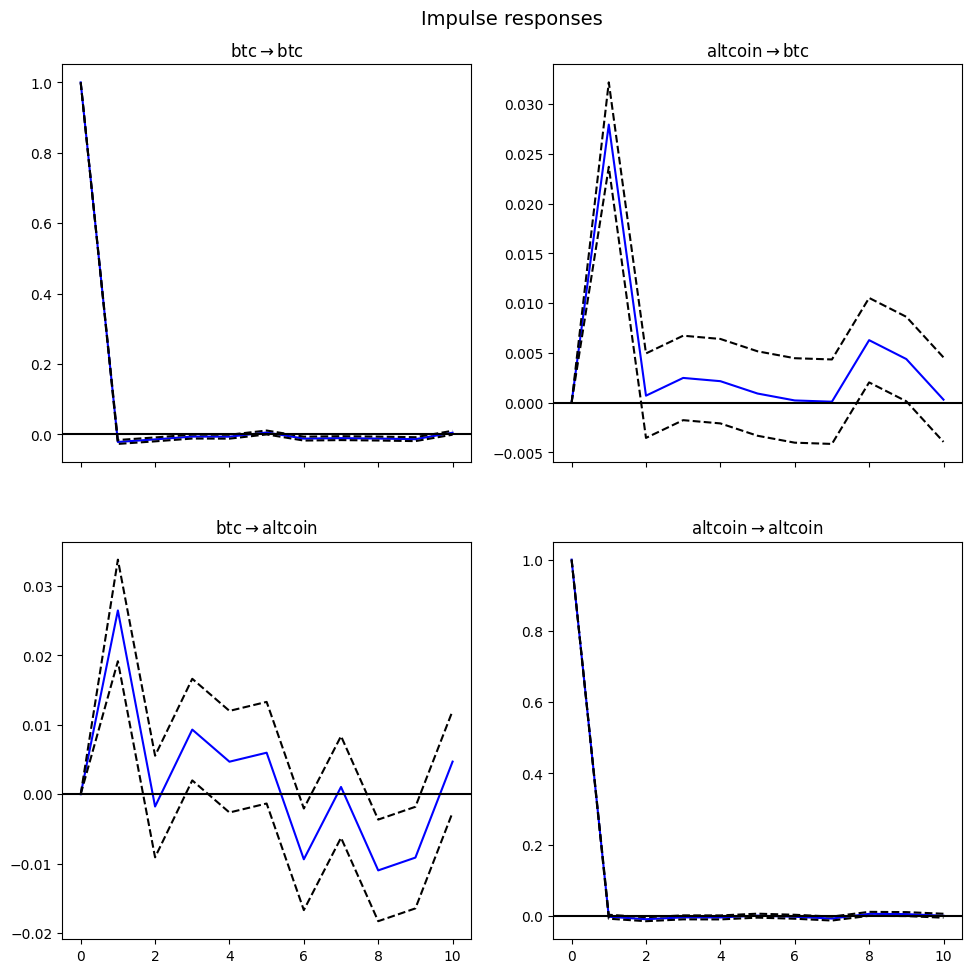

In [41]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller


# Align data and drop missing values caused by differencing
data = pd.concat([btc_data['log_return'], eth_data['log_return_alt']], axis=1).dropna()
data.columns = ['btc', 'altcoin']

# 2. Stationarity check (ADF Test)
for col in data.columns:
    result = adfuller(data[col])
    print(f"{col}: ADF Statistic = {result[0]}, p-value = {result[1]}")

# 3. Fit the VAR model
model = VAR(data)

# Select the optimal lag length based on AIC
lag_order = model.select_order(maxlags=15)    #  ------> change max lag 
print(f"Optimal lag order: {lag_order.selected_orders['aic']}")

# Fit the VAR model with the optimal lag order
var_result = model.fit(lag_order.selected_orders['aic'])

# 4. Summary of the VAR model
print(var_result.summary())

# 5. Granger causality within the VAR model
for col in data.columns:
    for target in data.columns:
        if col != target:
            print(f"Granger causality test: {col} -> {target}")
            print(var_result.test_causality(target, col, kind='wald'))

# 6. Impulse Response Function (IRF)
irf = var_result.irf(10)  #  --------> Impulse response for 10 periods
irf.plot(orth=False)
plt.show()


- analysis 
1. The oscillatory behavior could indicate market feedback or spillover effects between BTC and Altcoin markets.
2. Both BTC and Altcoin exhibit strong autocorrelation but differ in how they absorb shocks.
3. both coin performs stationary due to log return transformation 



- insight 
1. there is lag in both btc --> alt , and alt --> btc. This makes an arbitrage opportunity 
2. if we cannot capture the first upward spike well (due to system or internet issue) --> we can shhort the downward spike 


# Additional 

## Pre, post BTC spike analysis 
1. t_test : H0（虛無假設）: 跳躍前後的平均值無顯著差異 
2. F = S₁²/S₂² = pre_jump_variance / post_jump_variance
    1) S₁² 是第一組數據的方差
    2) S₂² 是第二組數據的方差
    

### VAR result analysis 

### MM indicator 

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, ks_2samp, levene, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_minmax_indicator(df, window=1440):  # 改為1440分鐘 = 24小時
    """
    計算 min-max indicator
    
    Parameters:
    -----------
    df : DataFrame with 'close' prices
    window : int, lookback window size (1440 = 24hr for 1min data)
    
    Returns:
    --------
    Series with min-max indicator values
    """
    close_prices = df['close']
    rolling_max = close_prices.rolling(window=window).max().shift(1)
    rolling_min = close_prices.rolling(window=window).min().shift(1)
    
    mm_indicator = (close_prices - rolling_min) / (rolling_max - rolling_min)
    return mm_indicator

def detect_jumps(mm_indicator, threshold=1.3):
    """
    使用 min-max indicator 檢測跳躍點
    超過前期最高價時視為跳躍
    """
    jump_points = mm_indicator[mm_indicator > threshold].index
    return jump_points


def calculate_vol_adjusted_returns(df, window=20):
    returns = df['close'].pct_change()
    rolling_std = returns.rolling(window=window).std()
    vol_adjusted = returns / rolling_std
    return vol_adjusted


def analyze_jumps(btc_data, alt_data, window=1440, obs_window=5, threshold=1.5):
    """
    分析比特幣跳躍前後的 altcoin min-max indicator 分布
    
    Parameters:
    -----------
    btc_data, alt_data : DataFrame with 'close' prices
    window : int, lookback window for min-max calculation (in minutes)
    obs_window : int, minutes to observe before/after jumps
    threshold : float, min-max threshold for jump detection
    """
    # 計算min-max indicator
    btc_mm = calculate_minmax_indicator(btc_data, window)
    alt_mm = calculate_minmax_indicator(alt_data, window)
    
    # 檢測跳躍點
    jump_points = detect_jumps(btc_mm, threshold)
    
    print(f"Total number of jumps identified: {len(jump_points)}")
    print(f"Jump percentage: {(len(jump_points)/len(btc_mm))*100:.6f}%")
    
    # 收集跳躍前後的min-max值
    before_jumps = []
    after_jumps = []
    
    for jump_time in jump_points:
        try:
            before_window = alt_mm.loc[jump_time - pd.Timedelta(minutes=obs_window):jump_time]
            after_window = alt_mm.loc[jump_time:jump_time + pd.Timedelta(minutes=obs_window)]
            
            before_window = before_window.dropna()
            after_window = after_window.dropna()
            
            before_jumps.extend(before_window.values)
            after_jumps.extend(after_window.values)
        except KeyError:
            continue
    
    before_jumps = np.array(before_jumps)
    after_jumps = np.array(after_jumps)
    
    before_jumps = before_jumps[np.isfinite(before_jumps)]
    after_jumps = after_jumps[np.isfinite(after_jumps)]
    
    # 統計檢驗
    ks_stat, ks_pvalue = ks_2samp(before_jumps, after_jumps)
    lev_stat, lev_pvalue = levene(before_jumps, after_jumps)
    t_stat, t_pvalue = ttest_ind(before_jumps, after_jumps)
    
    stats_dict = {
        'Before Jump': {
            'Mean': np.mean(before_jumps),
            'Std': np.std(before_jumps),
            'Skewness': skew(before_jumps),
            'Kurtosis': kurtosis(before_jumps)
        },
        'After Jump': {
            'Mean': np.mean(after_jumps),
            'Std': np.std(after_jumps),
            'Skewness': skew(after_jumps),
            'Kurtosis': kurtosis(after_jumps)
        }
    }
    
    # 繪製分布圖
    plt.figure(figsize=(12, 6))
    
    # 設定bins
    bins = np.linspace(-0.5, 2.0, 50)  
    
    plt.hist(before_jumps, bins=bins, alpha=0.5, 
            density=True, label='Before Jump', color='blue')
    plt.hist(after_jumps, bins=bins, alpha=0.5, 
            density=True, label='After Jump', color='red')
    
    plt.title(f'Min-Max Indicator Distribution Before and After BTC Jumps\n(Window: {window} minutes)')
    plt.xlabel('Min-Max Indicator')
    plt.ylabel('Density')
    plt.legend()
    
    print("\nStatistical Tests:")
    print(f"Kolmogorov-Smirnov test: stat={ks_stat:.4f}, p-value={ks_pvalue:.4f}")
    print(f"Levene's test: stat={lev_stat:.4f}, p-value={lev_pvalue:.4f}")
    print(f"T-test: stat={t_stat:.4f}, p-value={t_pvalue:.4f}")
    
    print("\nDistribution Statistics:")
    for period, stats_values in stats_dict.items():
        print(f"\n{period}:")
        for stat_name, value in stats_values.items():
            print(f"{stat_name}: {value:.6f}")
    
    plt.show()
    
    return before_jumps, after_jumps, stats_dict

# 可以測試不同的lookback window (以分鐘為單位)
lookback_windows = {
    '1h': 60,      # 1小時 = 60分鐘
    '12h': 720,    # 12小時 = 720分鐘
    '24h': 1440,   # 24小時 = 1440分鐘
    '5d': 7200     # 5天 = 7200分鐘
}

Total number of jumps identified: 182
Jump percentage: 0.035108%

Statistical Tests:
Kolmogorov-Smirnov test: stat=0.1058, p-value=0.0006
Levene's test: stat=16.3944, p-value=0.0001
T-test: stat=-3.4044, p-value=0.0007

Distribution Statistics:

Before Jump:
Mean: 0.929642
Std: 0.178045
Skewness: -0.397943
Kurtosis: 2.866876

After Jump:
Mean: 0.958877
Std: 0.148024
Skewness: -0.484165
Kurtosis: 5.686262


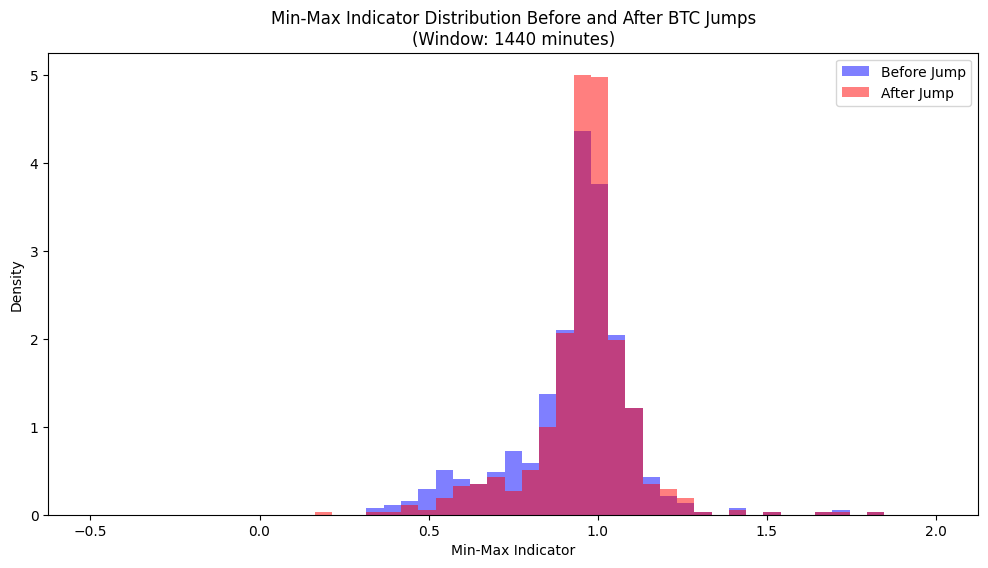

In [43]:
before_jumps, after_jumps, stats = analyze_jumps(
    btc_data=btc_data,
    alt_data=eth_data,
    window=1440,     
    obs_window=3,    
    threshold=1.1   
)

- analysis 
1. KS : 檢定前後是否來自同分配 
2. Levene : 跳躍前後的波動性（離散程度）有顯著差異
3. T : 跳躍前後的平均水平有顯著差異
    - All three test are sig --> 所有檢定的p值都極小（<0.05），表明這些變化都具有統計顯著性，不太可能是由隨機波動造成的。

#### volume indicator 

Total number of jumps identified: 34854
Jump percentage: 6.72%

Statistical Tests:
Kolmogorov-Smirnov test: stat=0.0126, p-value=0.0000
Levene's test: stat=3.0662, p-value=0.0799
T-test: stat=-0.0384, p-value=0.9694

Distribution Statistics:

Before Jump:
Mean: 0.000031
Std: 0.006370
Skewness: 0.912636
Kurtosis: 101.093586

After Jump:
Mean: 0.000032
Std: 0.006084
Skewness: 0.377501
Kurtosis: 84.656394


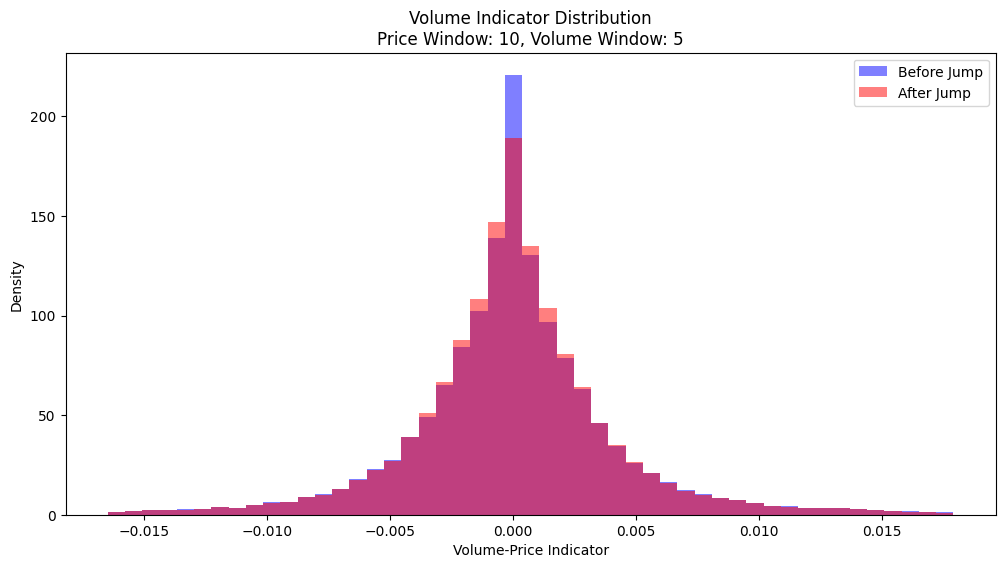

In [44]:
def calculate_volume_indicator(df, price_window=60, vol_window=20):
    """
    使用相對成交量指標
    """
    # 使用quote_asset_volume --> USD 計算
    volume_ratio = df['quote_asset_volume'] / df['quote_asset_volume'].rolling(vol_window).mean()
    price_change = df['close'].pct_change()
    
    # 將無限值和NaN替換為0
    volume_indicator = price_change * volume_ratio
    volume_indicator = volume_indicator.replace([np.inf, -np.inf], np.nan).fillna(0)
    
    return volume_indicator

    """ 
    當價格上漲且成交量異常大時，指標值為正且較大
    當價格下跌且成交量異常大時，指標值為負且較大
    ------------------------------------------> 以上兩者被視為「有效的」價格變動 
    當成交量接近平均水平時，即使價格變動，指標值也會較小 --> 我們不要的價格變動 
    """

def detect_jumps(indicator, threshold=0.5):  # 降低threshold
    """
    檢測跳躍點
    """
    std = indicator.std()
    mean = indicator.mean()
    
    # 使用標準差來定義跳躍
    jump_points = indicator[abs(indicator - mean) > threshold * std].index
    return jump_points

def analyze_volume_jumps(btc_data, alt_data, price_window=60, vol_window=20, obs_window=5, threshold=0.5):
    """
    分析volume indicator的跳躍前後的分布
    """
    # 計算指標
    btc_indicator = calculate_volume_indicator(btc_data, price_window, vol_window)
    alt_indicator = calculate_volume_indicator(alt_data, price_window, vol_window)
    
    # 檢測跳躍點
    jump_points = detect_jumps(btc_indicator, threshold)
    
    print(f"Total number of jumps identified: {len(jump_points)}")
    print(f"Jump percentage: {(len(jump_points)/len(btc_indicator))*100:.2f}%")
    
    if len(jump_points) == 0:
        print("No jumps detected. Try adjusting the threshold.")
        return None, None, None, None
    
    # 收集跳躍前後的值
    before_jumps = []
    after_jumps = []
    
    for jump_time in jump_points:
        try:
            before_window = alt_indicator.loc[jump_time - pd.Timedelta(minutes=obs_window):jump_time]
            after_window = alt_indicator.loc[jump_time:jump_time + pd.Timedelta(minutes=obs_window)]
            
            # 確保窗口內有數據
            if len(before_window) > 0 and len(after_window) > 0:
                before_jumps.extend(before_window.values)
                after_jumps.extend(after_window.values)
            
        except KeyError:
            continue
    
    # 檢查是否有足夠的數據進行分析
    if len(before_jumps) == 0 or len(after_jumps) == 0:
        print("Not enough data points for analysis.")
        return None, None, None, None
    
    before_jumps = np.array(before_jumps)
    after_jumps = np.array(after_jumps)
    
    # 移除無限值和NaN
    before_jumps = before_jumps[np.isfinite(before_jumps)]
    after_jumps = after_jumps[np.isfinite(after_jumps)]
    
    # 確保還有數據可以分析
    if len(before_jumps) == 0 or len(after_jumps) == 0:
        print("No valid data points after filtering.")
        return None, None, None, None
    
    # 統計檢驗
    ks_stat, ks_pvalue = ks_2samp(before_jumps, after_jumps)
    lev_stat, lev_pvalue = levene(before_jumps, after_jumps)
    t_stat, t_pvalue = ttest_ind(before_jumps, after_jumps)
    
    stats_dict = {
        'Before Jump': {
            'Mean': np.mean(before_jumps),
            'Std': np.std(before_jumps),
            'Skewness': skew(before_jumps),
            'Kurtosis': kurtosis(before_jumps)
        },
        'After Jump': {
            'Mean': np.mean(after_jumps),
            'Std': np.std(after_jumps),
            'Skewness': skew(after_jumps),
            'Kurtosis': kurtosis(after_jumps)
        }
    }
    
    # 繪製分布圖
    plt.figure(figsize=(12, 6))
    
    # 使用適當的bins範圍
    combined_data = np.concatenate([before_jumps, after_jumps])
    min_val = np.percentile(combined_data, 1)
    max_val = np.percentile(combined_data, 99)
    bins = np.linspace(min_val, max_val, 50)
    
    plt.hist(before_jumps, bins=bins, alpha=0.5, 
            density=True, label='Before Jump', color='blue')
    plt.hist(after_jumps, bins=bins, alpha=0.5, 
            density=True, label='After Jump', color='red')
    
    plt.title(f'Volume Indicator Distribution\nPrice Window: {price_window}, Volume Window: {vol_window}')
    plt.xlabel('Volume-Price Indicator')
    plt.ylabel('Density')
    plt.legend()
    
    print("\nStatistical Tests:")
    print(f"Kolmogorov-Smirnov test: stat={ks_stat:.4f}, p-value={ks_pvalue:.4f}")
    print(f"Levene's test: stat={lev_stat:.4f}, p-value={lev_pvalue:.4f}")
    print(f"T-test: stat={t_stat:.4f}, p-value={t_pvalue:.4f}")
    
    print("\nDistribution Statistics:")
    for period, stats_values in stats_dict.items():
        print(f"\n{period}:")
        for stat_name, value in stats_values.items():
            print(f"{stat_name}: {value:.6f}")
    
    plt.show()
    
    return before_jumps, after_jumps, stats_dict

# 使用示例
before, after, stats = analyze_volume_jumps(btc_data, eth_data, 
                                          price_window=10,   
                                          vol_window=5,      
                                          obs_window=1,      
                                          threshold=1.2)     

- analysis 
1. BTC的成交量異常對ETH的價格方向影響不大
2. 成交量跳躍不會顯著影響價格走勢的方向（均值變化不顯著）--> T test p-value > 0.05 
3. 成交量異常更多影響的是波動性（Levene's test顯著）而不是價格方向


# Trading implementation 

- pepe/usdt

In [46]:
if __name__ == "__main__":
    # 假設數據路徑
    data_path = "/Users/mouyasushi/Desktop/crypto_strat/alpha/Quant-Training-Group-G/Alpha-Research/kline/binance/PEPEUSDT/1m"
    
    # 加載數據
    pepe_data = load_crypto_data(
        base_path=data_path,
        symbol="PEPEUSDT",
        year="2024",
        freq="1m"
    )
    
    # 檢查數據質量
    quality_report = check_data_quality(btc_data)
    
    # 輸出基本信息
    print(f"Loaded data shape: {btc_data.shape}")
    print(f"Date range: {quality_report['date_range']}")
    print(f"Total rows: {quality_report['total_rows']}")

KeyError: 'open_time'

In [47]:
pepe_data

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2024-01-01 00:00:00,0.000001,0.000001,0.000001,0.000001,3.031286e+10,2024-01-01 00:00:59.999,39397.838776,18,2.942519e+10,38252.744663,0
1,2024-01-01 00:01:00,0.000001,0.000001,0.000001,0.000001,1.023134e+10,2024-01-01 00:01:59.999,13199.367793,9,9.434208e+07,122.644705,0
2,2024-01-01 00:02:00,0.000001,0.000001,0.000001,0.000001,5.133787e+08,2024-01-01 00:02:59.999,662.395274,5,1.368076e+07,17.784989,0
3,2024-01-01 00:03:00,0.000001,0.000001,0.000001,0.000001,4.851861e+09,2024-01-01 00:03:59.999,6286.015979,10,2.711469e+09,3524.910061,0
4,2024-01-01 00:04:00,0.000001,0.000001,0.000001,0.000001,9.567615e+08,2024-01-01 00:04:59.999,1243.289901,11,9.067615e+08,1178.789899,0
...,...,...,...,...,...,...,...,...,...,...,...,...
519835,2024-12-26 23:55:00,0.000017,0.000017,0.000017,0.000017,2.254965e+09,2024-12-26 23:55:59.999,39210.322444,113,2.761224e+08,4804.179211,0
519836,2024-12-26 23:56:00,0.000017,0.000017,0.000017,0.000017,3.632070e+09,2024-12-26 23:56:59.999,63165.313393,88,5.059028e+08,8801.483622,0
519837,2024-12-26 23:57:00,0.000017,0.000017,0.000017,0.000017,5.599243e+09,2024-12-26 23:57:59.999,97394.679736,113,2.086694e+09,36288.741175,0
519838,2024-12-26 23:58:00,0.000017,0.000017,0.000017,0.000017,7.779294e+08,2024-12-26 23:58:59.999,13528.584273,49,7.027493e+07,1222.473109,0


- sui/usdt

In [48]:
if __name__ == "__main__":
    # 假設數據路徑
    data_path = "/Users/mouyasushi/Desktop/crypto_strat/alpha/Quant-Training-Group-G/Alpha-Research/kline/binance/SUIUSDT/1m"
    
    # 加載數據
    sui_data = load_crypto_data(
        base_path=data_path,
        symbol="SUIUSDT",
        year="2024",
        freq="1m"
    )
    
    # 檢查數據質量
    quality_report = check_data_quality(btc_data)
    
    # 輸出基本信息
    print(f"Loaded data shape: {btc_data.shape}")
    print(f"Date range: {quality_report['date_range']}")
    print(f"Total rows: {quality_report['total_rows']}")

KeyError: 'open_time'

In [49]:
sui_data

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2024-01-01 00:00:00,0.7753,0.7764,0.7742,0.7761,57038.9,2024-01-01 00:00:59.999,44232.74470,180,48319.5,37470.92411,0
1,2024-01-01 00:01:00,0.7760,0.7763,0.7741,0.7747,19888.2,2024-01-01 00:01:59.999,15416.42916,112,1648.7,1277.73575,0
2,2024-01-01 00:02:00,0.7748,0.7759,0.7723,0.7725,111923.1,2024-01-01 00:02:59.999,86621.92425,356,43315.0,33546.75307,0
3,2024-01-01 00:03:00,0.7725,0.7731,0.7724,0.7729,11312.0,2024-01-01 00:03:59.999,8741.16497,78,5372.5,4151.81248,0
4,2024-01-01 00:04:00,0.7731,0.7757,0.7730,0.7752,51782.5,2024-01-01 00:04:59.999,40100.50756,146,33415.8,25888.96013,0
...,...,...,...,...,...,...,...,...,...,...,...,...
519835,2024-12-26 23:55:00,4.1983,4.1984,4.1931,4.1960,7303.3,2024-12-26 23:55:59.999,30645.75005,149,2542.5,10668.97446,0
519836,2024-12-26 23:56:00,4.1960,4.1991,4.1954,4.1991,7175.9,2024-12-26 23:56:59.999,30116.78900,127,2460.0,10323.56473,0
519837,2024-12-26 23:57:00,4.1991,4.2011,4.1973,4.2006,7901.8,2024-12-26 23:57:59.999,33181.11498,109,2737.1,11492.00721,0
519838,2024-12-26 23:58:00,4.2005,4.2028,4.2001,4.2023,9324.5,2024-12-26 23:58:59.999,39175.30374,118,4110.3,17266.22098,0


- bnb /usdt

In [50]:
if __name__ == "__main__":
    # 假設數據路徑
    data_path = "/Users/mouyasushi/Desktop/crypto_strat/alpha/Quant-Training-Group-G/Alpha-Research/kline/binance/BNBUSDT/1m"
    
    # 加載數據
    bnb_data = load_crypto_data(
        base_path=data_path,
        symbol="BNBUSDT",
        year="2024",
        freq="1m"
    )
    
    # 檢查數據質量
    quality_report = check_data_quality(btc_data)
    
    # 輸出基本信息
    print(f"Loaded data shape: {btc_data.shape}")
    print(f"Date range: {quality_report['date_range']}")
    print(f"Total rows: {quality_report['total_rows']}")

KeyError: 'open_time'

In [51]:
bnb_data

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2024-01-01 00:00:00,311.90,312.10,311.60,312.10,408.725,2024-01-01 00:00:59.999,127457.59760,286,264.939,82613.43990,0
1,2024-01-01 00:01:00,312.10,312.40,312.00,312.40,146.711,2024-01-01 00:01:59.999,45816.51010,202,112.525,35144.83400,0
2,2024-01-01 00:02:00,312.40,312.80,312.30,312.80,309.007,2024-01-01 00:02:59.999,96587.72960,186,225.589,70519.93130,0
3,2024-01-01 00:03:00,312.80,313.00,312.80,312.90,244.931,2024-01-01 00:03:59.999,76639.26470,276,126.624,39622.55380,0
4,2024-01-01 00:04:00,312.90,313.10,312.80,313.10,136.661,2024-01-01 00:04:59.999,42768.88490,132,119.878,37517.12880,0
...,...,...,...,...,...,...,...,...,...,...,...,...
519835,2024-12-26 23:55:00,688.95,689.18,688.76,689.05,99.452,2024-12-26 23:55:59.999,68517.66436,364,43.913,30250.65204,0
519836,2024-12-26 23:56:00,689.05,689.20,688.80,689.10,276.942,2024-12-26 23:56:59.999,190832.83631,445,36.362,25054.83081,0
519837,2024-12-26 23:57:00,689.17,689.50,689.17,689.50,27.687,2024-12-26 23:57:59.999,19084.16206,139,21.306,14686.04186,0
519838,2024-12-26 23:58:00,689.50,689.64,689.49,689.50,203.696,2024-12-26 23:58:59.999,140457.57668,294,164.957,113746.05949,0


- btc_data 

In [52]:
if __name__ == "__main__":
    # 假設數據路徑
    data_path = "/Users/mouyasushi/Desktop/crypto_strat/alpha/Quant-Training-Group-G/Alpha-Research/kline/binance/BTCUSDT/1m"
    
    # 加載數據
    btc_data = load_crypto_data(
        base_path=data_path,
        symbol="BTCUSDT",
        year="2024",
        freq="1m"
    )
    
    # 檢查數據質量
    quality_report = check_data_quality(btc_data)
    
    # 輸出基本信息
    print(f"Loaded data shape: {btc_data.shape}")
    print(f"Date range: {quality_report['date_range']}")
    print(f"Total rows: {quality_report['total_rows']}")

Loaded data shape: (519445, 12)
Date range: (Timestamp('2024-01-01 00:00:00'), Timestamp('2024-12-26 17:24:00'))
Total rows: 519445


In [53]:
btc_data

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2024-01-01 00:00:00,42283.58,42298.62,42261.02,42298.61,35.92724,2024-01-01 00:00:59.999,1.519032e+06,1327,23.18766,9.803947e+05,0
1,2024-01-01 00:01:00,42298.62,42320.00,42298.61,42320.00,21.16779,2024-01-01 00:01:59.999,8.955809e+05,1348,13.47483,5.700808e+05,0
2,2024-01-01 00:02:00,42319.99,42331.54,42319.99,42325.50,21.60391,2024-01-01 00:02:59.999,9.143711e+05,1019,11.21801,4.747986e+05,0
3,2024-01-01 00:03:00,42325.50,42368.00,42325.49,42367.99,30.50730,2024-01-01 00:03:59.999,1.291997e+06,1241,24.04878,1.018449e+06,0
4,2024-01-01 00:04:00,42368.00,42397.23,42367.99,42397.23,46.05107,2024-01-01 00:04:59.999,1.951945e+06,1415,34.12804,1.446539e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
519440,2024-12-26 17:20:00,96338.54,96338.55,96069.79,96069.80,23.85460,2024-12-26 17:20:59.999,2.295009e+06,8233,3.89630,3.747074e+05,0
519441,2024-12-26 17:21:00,96069.80,96149.70,96069.79,96139.98,21.78187,2024-12-26 17:21:59.999,2.093344e+06,5818,16.55350,1.590874e+06,0
519442,2024-12-26 17:22:00,96139.99,96155.25,96076.37,96084.35,5.66940,2024-12-26 17:22:59.999,5.449526e+05,3683,1.82218,1.751506e+05,0
519443,2024-12-26 17:23:00,96084.35,96152.00,96084.35,96100.00,12.01514,2024-12-26 17:23:59.999,1.154861e+06,4739,4.68979,4.507189e+05,0


In [54]:
# make sure data is in order and time is set to index 



btc_data.set_index('open_time', inplace=True)
pepe_data.set_index('open_time', inplace=True)
sui_data.set_index('open_time', inplace=True)
bnb_data.set_index('open_time', inplace=True)


# 排序數據
btc_data.sort_index(inplace=True)
pepe_data.sort_index(inplace=True)
sui_data.sort_index(inplace=True)
bnb_data.sort_index(inplace=True)




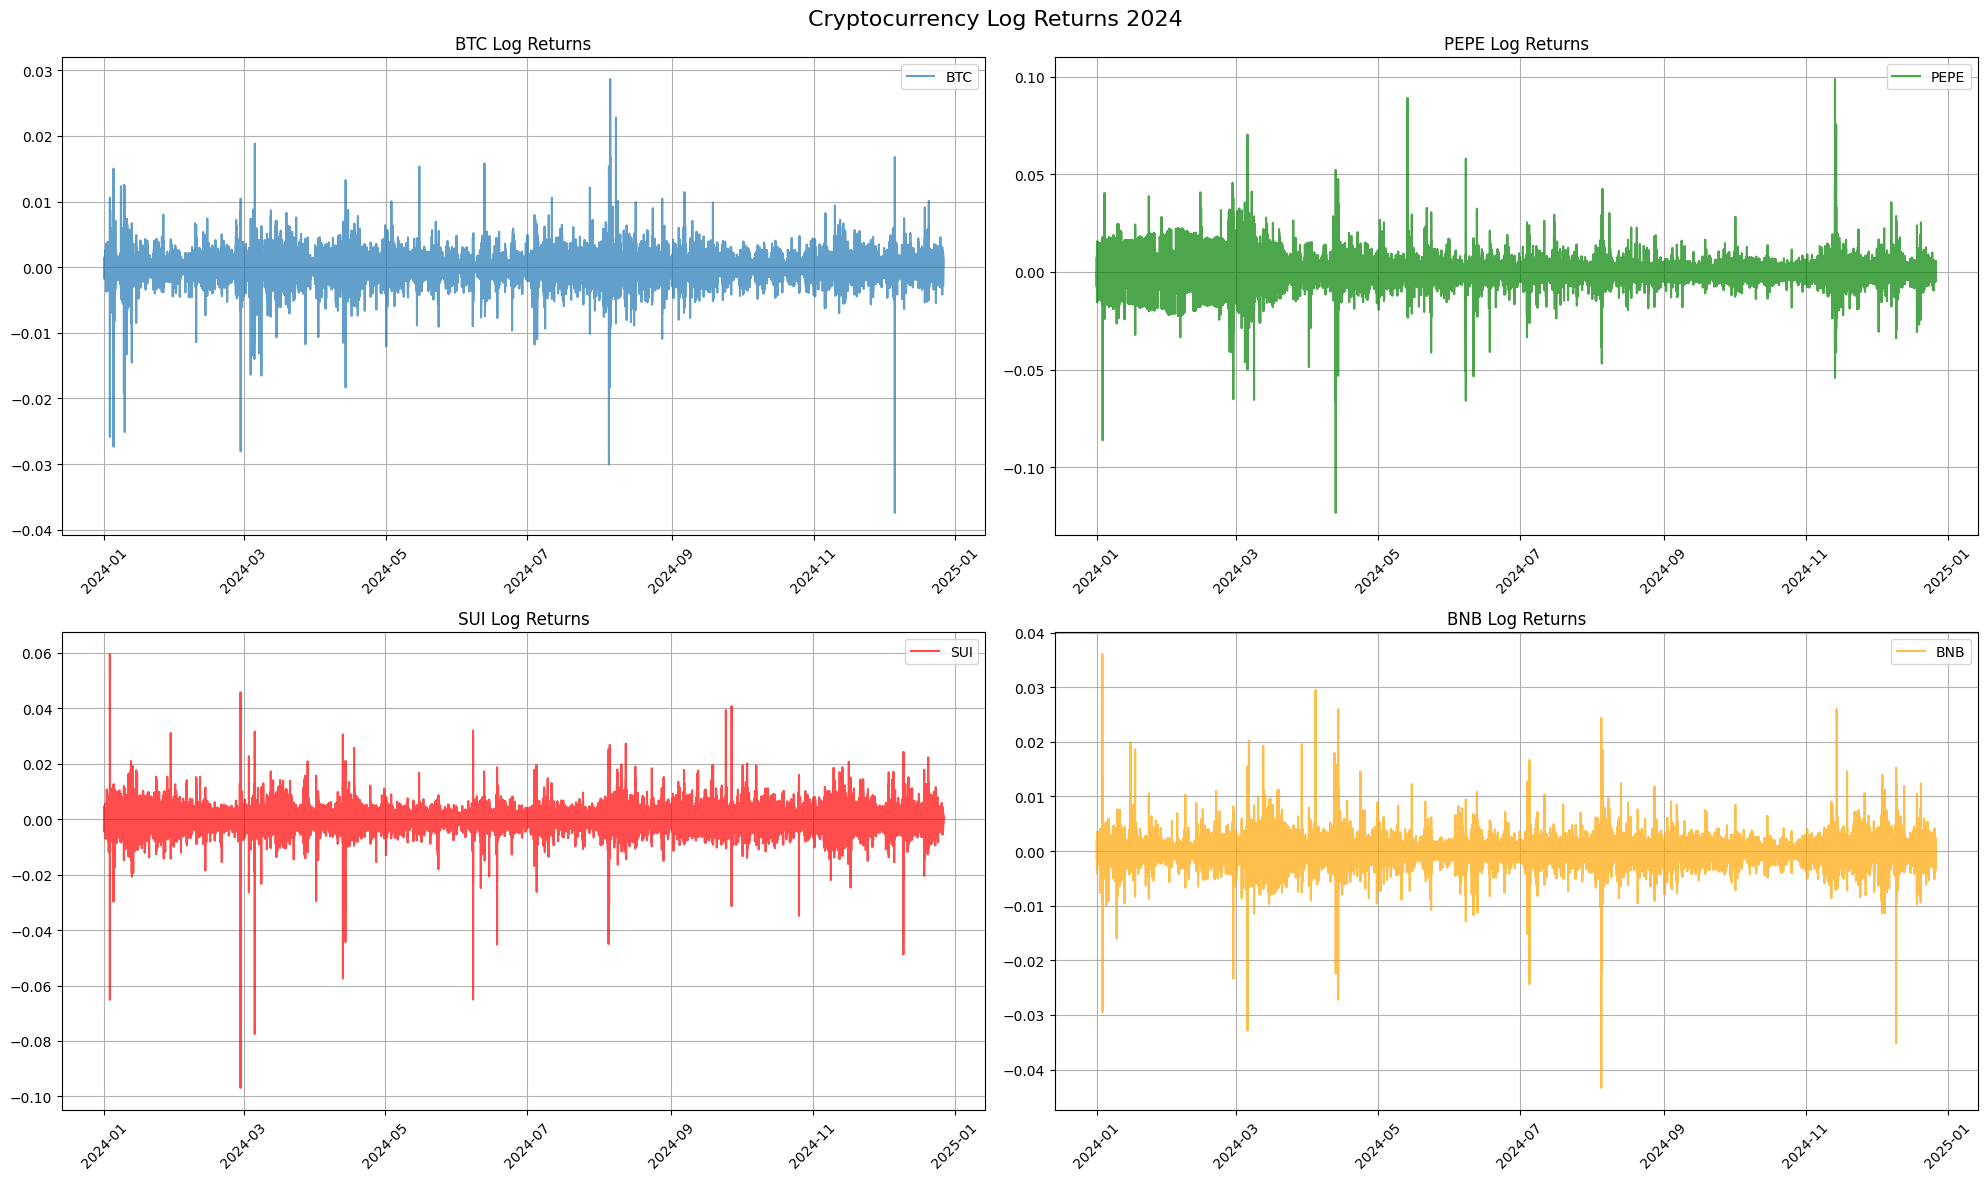


Summary Statistics:

BTC Returns:
count    519444.000000
mean          0.000002
std           0.000751
min          -0.037448
25%          -0.000311
50%           0.000000
75%           0.000316
max           0.028671
Name: close, dtype: float64

PEPE Returns:
count    519839.000000
mean          0.000005
std           0.003443
min          -0.123471
25%          -0.001222
50%           0.000000
75%           0.001216
max           0.098846
Name: close, dtype: float64

SUI Returns:
count    519839.000000
mean          0.000003
std           0.001723
min          -0.096942
25%          -0.000825
50%           0.000000
75%           0.000809
max           0.059596
Name: close, dtype: float64

BNB Returns:
count    519839.000000
mean          0.000002
std           0.000877
min          -0.043367
25%          -0.000347
50%           0.000000
75%           0.000349
max           0.036087
Name: close, dtype: float64


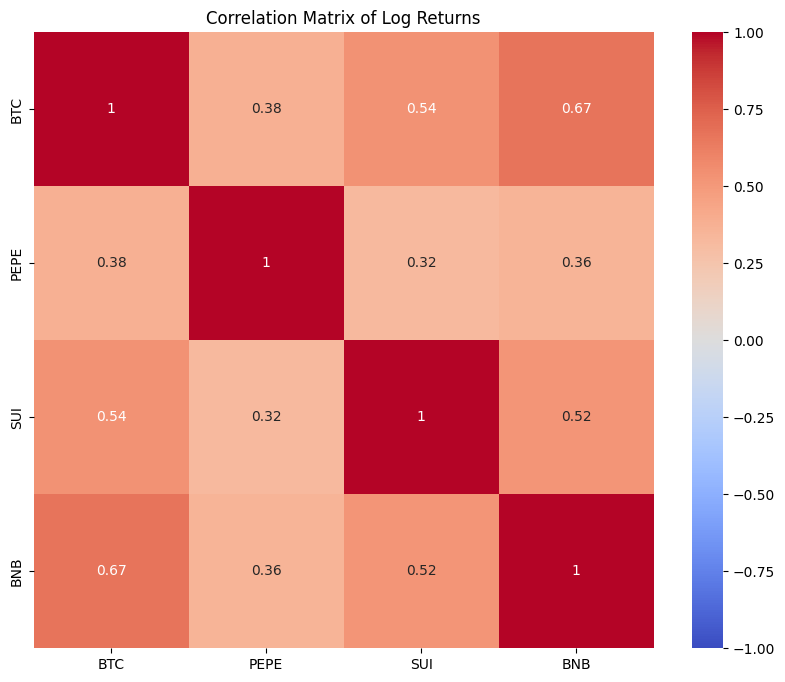

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate log returns for each coin
btc_returns = np.log(btc_data['close']).diff()
pepe_returns = np.log(pepe_data['close']).diff()
sui_returns = np.log(sui_data['close']).diff()
bnb_returns = np.log(bnb_data['close']).diff()

# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Cryptocurrency Log Returns 2024', fontsize=16)

# Plot each coin's returns
axes[0, 0].plot(btc_returns.index, btc_returns.values, label='BTC', alpha=0.7)
axes[0, 0].set_title('BTC Log Returns')
axes[0, 0].grid(True)

axes[0, 1].plot(pepe_returns.index, pepe_returns.values, label='PEPE', alpha=0.7, color='green')
axes[0, 1].set_title('PEPE Log Returns')
axes[0, 1].grid(True)

axes[1, 0].plot(sui_returns.index, sui_returns.values, label='SUI', alpha=0.7, color='red')
axes[1, 0].set_title('SUI Log Returns')
axes[1, 0].grid(True)

axes[1, 1].plot(bnb_returns.index, bnb_returns.values, label='BNB', alpha=0.7, color='orange')
axes[1, 1].set_title('BNB Log Returns')
axes[1, 1].grid(True)

# Rotate x-axis labels for better readability
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("\nBTC Returns:")
print(btc_returns.describe())
print("\nPEPE Returns:")
print(pepe_returns.describe())
print("\nSUI Returns:")
print(sui_returns.describe())
print("\nBNB Returns:")
print(bnb_returns.describe())

# Calculate correlation matrix
returns_df = pd.DataFrame({
    'BTC': btc_returns,
    'PEPE': pepe_returns,
    'SUI': sui_returns,
    'BNB': bnb_returns
})

correlation_matrix = returns_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Log Returns')
plt.show()

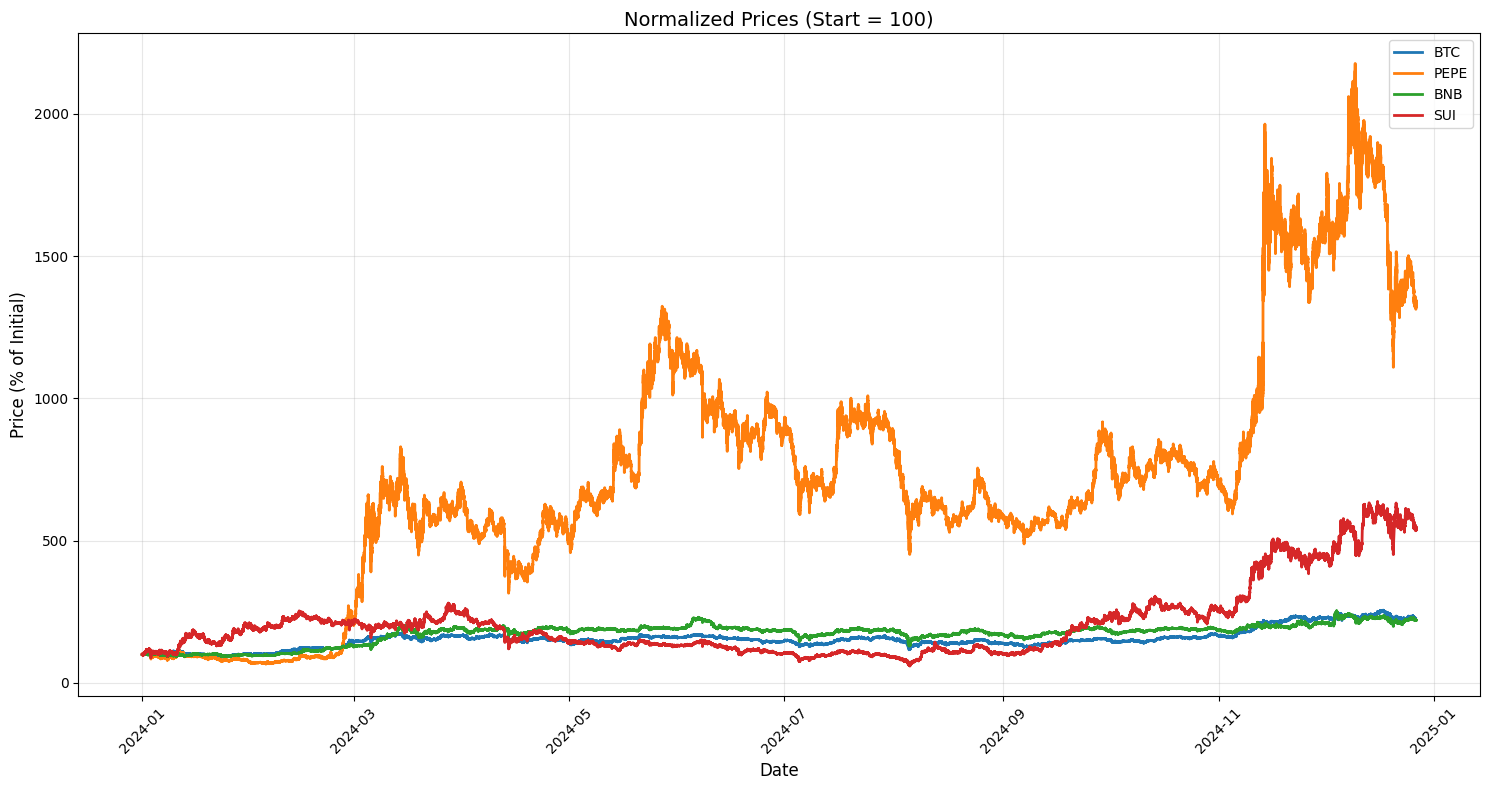

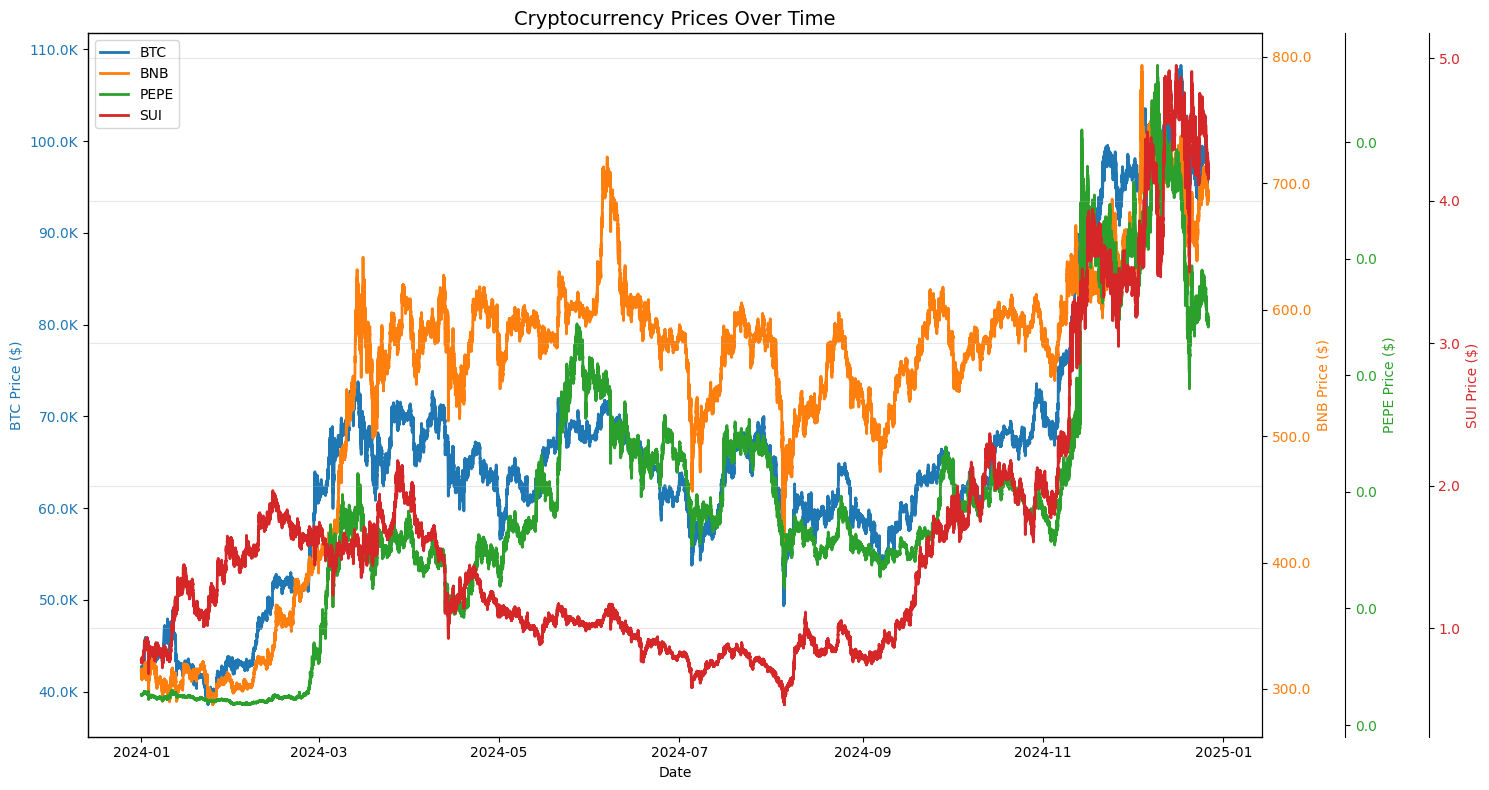


Price Summary Statistics:

BTC Prices:
count    519445.000000
mean      65477.991259
std       14370.003064
min       38558.920000
25%       58916.000000
50%       64100.010000
75%       68779.330000
max      108258.390000
Name: close, dtype: float64

PEPE Prices:
count    5.198400e+05
mean     9.407068e-06
std      5.664884e-06
min      8.700000e-07
25%      7.080000e-06
50%      8.670000e-06
75%      1.171000e-05
max      2.830000e-05
Name: close, dtype: float64

BNB Prices:
count    519840.000000
mean        540.472061
std         110.542149
min         287.500000
25%         517.800000
50%         575.600000
75%         599.700000
max         793.280000
Name: close, dtype: float64

SUI Prices:
count    519840.000000
mean          1.621881
std           0.983822
min           0.463500
25%           0.926600
50%           1.336350
75%           1.816600
max           4.951000
Name: close, dtype: float64


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Method 1: Using percentage change from start (normalized prices)
def plot_normalized_prices():
    # Calculate percentage change from first price
    btc_norm = btc_data['close'] / btc_data['close'].iloc[0] * 100
    pepe_norm = pepe_data['close'] / pepe_data['close'].iloc[0] * 100
    bnb_norm = bnb_data['close'] / bnb_data['close'].iloc[0] * 100
    sui_norm = sui_data['close'] / sui_data['close'].iloc[0] * 100

    plt.figure(figsize=(15, 8))
    plt.plot(btc_norm.index, btc_norm, label='BTC', linewidth=2)
    plt.plot(pepe_norm.index, pepe_norm, label='PEPE', linewidth=2)
    plt.plot(bnb_norm.index, bnb_norm, label='BNB', linewidth=2)
    plt.plot(sui_norm.index, sui_norm, label='SUI', linewidth=2)

    plt.title('Normalized Prices (Start = 100)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (% of Initial)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Method 2: Using multiple y-axes
def plot_multiple_axes():
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Format y-axis to show thousands with K
    def thousands_formatter(x, pos):
        return f'{x/1000:.1f}K' if abs(x) >= 1000 else f'{x:.1f}'
    
    formatter = FuncFormatter(thousands_formatter)
    
    # BTC on primary y-axis
    color1 = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('BTC Price ($)', color=color1)
    ln1 = ax1.plot(btc_data.index, btc_data['close'], color=color1, label='BTC', linewidth=2)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.yaxis.set_major_formatter(formatter)

    # Create other axes
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis
    ax4 = ax1.twinx()  # instantiate a fourth axes that shares the same x-axis
    
    # Offset the right spines
    ax3.spines['right'].set_position(('outward', 60))
    ax4.spines['right'].set_position(('outward', 120))

    # Plot other cryptocurrencies
    color2 = 'tab:orange'
    color3 = 'tab:green'
    color4 = 'tab:red'
    
    ln2 = ax2.plot(bnb_data.index, bnb_data['close'], color=color2, label='BNB', linewidth=2)
    ln3 = ax3.plot(pepe_data.index, pepe_data['close'], color=color3, label='PEPE', linewidth=2)
    ln4 = ax4.plot(sui_data.index, sui_data['close'], color=color4, label='SUI', linewidth=2)

    # Set labels and colors for secondary axes
    ax2.set_ylabel('BNB Price ($)', color=color2)
    ax3.set_ylabel('PEPE Price ($)', color=color3)
    ax4.set_ylabel('SUI Price ($)', color=color4)

    ax2.tick_params(axis='y', labelcolor=color2)
    ax3.tick_params(axis='y', labelcolor=color3)
    ax4.tick_params(axis='y', labelcolor=color4)

    # Format axis labels
    ax2.yaxis.set_major_formatter(formatter)
    ax3.yaxis.set_major_formatter(formatter)
    ax4.yaxis.set_major_formatter(formatter)

    # Add legend
    lns = ln1 + ln2 + ln3 + ln4
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc='upper left')

    plt.title('Cryptocurrency Prices Over Time', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Run both plots
plot_normalized_prices()
plot_multiple_axes()

# Print price summary statistics
print("\nPrice Summary Statistics:")
for name, data in [('BTC', btc_data), ('PEPE', pepe_data), ('BNB', bnb_data), ('SUI', sui_data)]:
    print(f"\n{name} Prices:")
    print(data['close'].describe())

#### Trading signal 

In [60]:
import pandas as pd
import numpy as np
from typing import Dict, List
from dataclasses import dataclass
import matplotlib.pyplot as plt

@dataclass
class TradeResult:
    entry_time: pd.Timestamp
    exit_time: pd.Timestamp
    entry_price: float
    exit_price: float
    pnl: float
    exit_reason: str
    volume: float

class BLUTA:
    def __init__(self, 
                 w: int = 24,          # Rolling window (24 periods = 6 hours with 15min data)
                 alpha: float = 2.0,    # Take profit multiplier
                 beta: float = 1.25,    # Stop loss multiplier
                 k: int = 4,           # Maximum holding periods
                 initial_capital: float = 100000,
                 maker_fee: float = 0.00015,
                 taker_fee: float = 0.0003):
        """
        Initialize BLUTA strategy
        """
        self.w = w
        self.alpha = alpha
        self.beta = beta
        self.k = k
        self.initial_capital = initial_capital
        self.maker_fee = maker_fee
        self.taker_fee = taker_fee
        self.trades: List[TradeResult] = []

    def detect_btc_signals(self, btc_data: pd.DataFrame) -> pd.DatetimeIndex:
        """
        Detect BTC price jumps using logarithmic returns with rolling window
        to avoid look-ahead bias
        """
        # Calculate logarithmic returns
        log_returns = pd.Series(np.log(btc_data['close']).diff(), index=btc_data.index)
        
        # Initialize signals array
        signals = pd.Series(False, index=btc_data.index)
        
        
        lookback = 7200
        
        # Calculate rolling percentile threshold
        for i in range(lookback, len(log_returns)):
            historical_returns = log_returns.iloc[i-lookback:i]
            if not historical_returns.empty:
                threshold = np.percentile(historical_returns.dropna(), 98)
                current_return = log_returns.iloc[i]
                if not pd.isna(current_return) and current_return > threshold:
                    signals.iloc[i] = True
        
        return signals[signals].index

    def backtest(self, 
                btc_data: pd.DataFrame, 
                alt_data: pd.DataFrame,
                start_date: pd.Timestamp = None,
                end_date: pd.Timestamp = None) -> Dict:
        """
        Backtest BLUTA strategy on a single altcoin
        """
        # Ensure data is properly indexed
        btc_data = btc_data.sort_index()
        alt_data = alt_data.sort_index()

        # Add extra lookback period for signal calculation
        lookback_start = btc_data.index[0] - pd.Timedelta(days=5)
        extended_btc_data = btc_data[btc_data.index >= lookback_start].copy()

        # Filter data by date range if provided
        if start_date:
            btc_data = btc_data[btc_data.index >= start_date]
            alt_data = alt_data[alt_data.index >= start_date]
        if end_date:
            btc_data = btc_data[btc_data.index <= end_date]
            alt_data = alt_data[alt_data.index <= end_date]

        # Detect signals using extended data
        all_signals = self.detect_btc_signals(extended_btc_data)
        # Filter signals to requested period
        signals = all_signals[all_signals.isin(btc_data.index)]

        # Initialize tracking variables
        self.trades = []
        current_position = False
        capital = self.initial_capital

        # Process each signal
        for signal_time in signals:
            if current_position:
                continue

            try:
                # Get entry price (next candlestick open)
                entry_idx = alt_data.index.get_loc(signal_time) + 1
                if entry_idx >= len(alt_data):
                    continue

                entry_time = alt_data.index[entry_idx]
                entry_price = alt_data.iloc[entry_idx]['open']

                # Calculate rolling standard deviation using only historical data
                hist_prices = alt_data['close'].iloc[:entry_idx]
                rolling_std = hist_prices.rolling(window=self.w).std().iloc[-1]

                if pd.isna(rolling_std):
                    continue

                # Set profit target and stop loss
                take_profit = entry_price + (self.alpha * rolling_std)
                stop_loss = entry_price - (self.beta * rolling_std)

                # Track position
                current_position = True
                position_size = capital * (1 - self.taker_fee)
                shares = position_size / entry_price

                # Monitor position for k periods
                for i in range(1, self.k + 1):
                    current_idx = entry_idx + i
                    if current_idx >= len(alt_data):
                        break

                    current_high = alt_data.iloc[current_idx]['high']
                    current_low = alt_data.iloc[current_idx]['low']
                    current_close = alt_data.iloc[current_idx]['close']

                    # Check exits
                    exit_price = None
                    exit_reason = None

                    # Case 1: Both take profit and stop loss hit
                    if current_high >= take_profit and current_low <= stop_loss:
                        exit_price = stop_loss  # Conservative approach
                        exit_reason = 'both_triggered'
                    # Case 2: Take profit hit
                    elif current_high >= take_profit:
                        exit_price = take_profit
                        exit_reason = 'take_profit'
                    # Case 3: Stop loss hit
                    elif current_low <= stop_loss:
                        exit_price = stop_loss
                        exit_reason = 'stop_loss'
                    # Case 4: Time exit
                    elif i == self.k:
                        exit_price = current_close
                        exit_reason = 'time_exit'

                    if exit_price:
                        exit_time = alt_data.index[current_idx]

                        # Calculate P&L
                        exit_value = shares * exit_price
                        if exit_reason == 'take_profit':
                            exit_value *= (1 - self.maker_fee)
                        else:
                            exit_value *= (1 - self.taker_fee)

                        pnl = exit_value - position_size

                        # Record trade
                        self.trades.append(TradeResult(
                            entry_time=entry_time,
                            exit_time=exit_time,
                            entry_price=entry_price,
                            exit_price=exit_price,
                            pnl=pnl,
                            exit_reason=exit_reason,
                            volume=position_size
                        ))

                        # Update capital
                        capital = exit_value
                        current_position = False
                        break

            except (KeyError, IndexError):
                continue

        return self.calculate_performance_metrics(capital)

    def calculate_performance_metrics(self, final_capital: float) -> Dict:
        """
        Calculate strategy performance metrics with improved calculations
        
        Args:
            final_capital: Final portfolio value after all trades
            
        Returns:
            Dictionary containing various performance metrics
        """
        if not self.trades:
            return {
                'total_trades': 0,
                'winning_trades': 0,
                'win_rate': 0,
                'total_return': 0,
                'avg_return_per_trade': 0,
                'max_drawdown': 0,
                'sharpe_ratio': 0,
                'volatility': 0
            }

        # Calculate returns per trade (using log returns for better statistical properties)
        returns = [np.log(1 + trade.pnl / trade.volume) for trade in self.trades]
        winning_trades = sum(1 for r in returns if r > 0)
        
        # Calculate total return
        total_return = (final_capital / self.initial_capital - 1) * 100
        
        # Calculate drawdown
        cumulative_returns = np.exp(np.cumsum(returns))  # Convert log returns back
        running_max = np.maximum.accumulate(cumulative_returns)
        drawdowns = (running_max - cumulative_returns) / running_max
        max_drawdown = np.max(drawdowns) if len(drawdowns) > 0 else 0
        
        # Calculate trading frequency and annualization factor
        if len(self.trades) >= 2:
            avg_days_between_trades = (self.trades[-1].exit_time - self.trades[0].entry_time).days / len(self.trades)
            trades_per_year = 365 / avg_days_between_trades if avg_days_between_trades > 0 else 0
        else:
            trades_per_year = 0
        
        # Calculate annualized metrics
        mean_return = np.mean(returns) if returns else 0
        volatility = np.std(returns) if returns else 0
        
        # Annualized Sharpe Ratio calculation
        risk_free_rate = 0  # 1% annual risk-free rate
        if volatility > 0 and trades_per_year > 0:
            annualized_return = (1 + mean_return) ** trades_per_year - 1
            annualized_volatility = volatility * np.sqrt(trades_per_year)
            sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
        else:
            sharpe_ratio = 0
        
        return {
            'total_trades': len(self.trades),
            'winning_trades': winning_trades,
            'win_rate': winning_trades / len(self.trades) if len(self.trades) > 0 else 0,
            'total_return': total_return,
            'avg_return_per_trade': (np.exp(mean_return) - 1) * 100 if returns else 0,
            'max_drawdown': max_drawdown * 100,
            'sharpe_ratio': sharpe_ratio,
            'volatility': volatility * 100  # Convert to percentage
        }
             

def plot_equity_curve(trades: List[TradeResult], initial_capital: float, title: str):
    """Plot equity curve from trade results"""
    if not trades:
        return

    equity = [initial_capital]
    dates = [trades[0].entry_time]
    current_capital = initial_capital

    for trade in trades:
        # Update capital based on relative return instead of absolute PnL
        current_capital = current_capital * (1 + trade.pnl / trade.volume)
        equity.append(current_capital)
        dates.append(trade.exit_time)

    plt.figure(figsize=(12, 6))
    plt.plot(dates, equity)
    plt.title(f'Equity Curve - {title}')
    plt.xlabel('Date')
    plt.ylabel('Capital')
    plt.grid(True)
    plt.show()

def run_strategy(btc_data: pd.DataFrame, alt_coins: Dict[str, pd.DataFrame], 
                start_date: str = None, end_date: str = None) -> Dict[str, Dict]:
    """Run BLUTA strategy on multiple altcoins"""
    results = {}

    start_ts = pd.Timestamp(start_date) if start_date else None
    end_ts = pd.Timestamp(end_date) if end_date else None

    bluta = BLUTA(
        w=7200,
        alpha=2.0,
        beta=1.25,
        k=4,
        initial_capital=100000,
        maker_fee=0,  # 0.00015
        taker_fee=0   # 0.0003     # change commision fee 
    )

    for coin_name, coin_data in alt_coins.items():
        results[coin_name] = bluta.backtest(
            btc_data=btc_data,
            alt_data=coin_data,
            start_date=start_ts,
            end_date=end_ts
        )

        if bluta.trades:
            plot_equity_curve(bluta.trades, bluta.initial_capital, f'{coin_name} Trading Results')

    return results

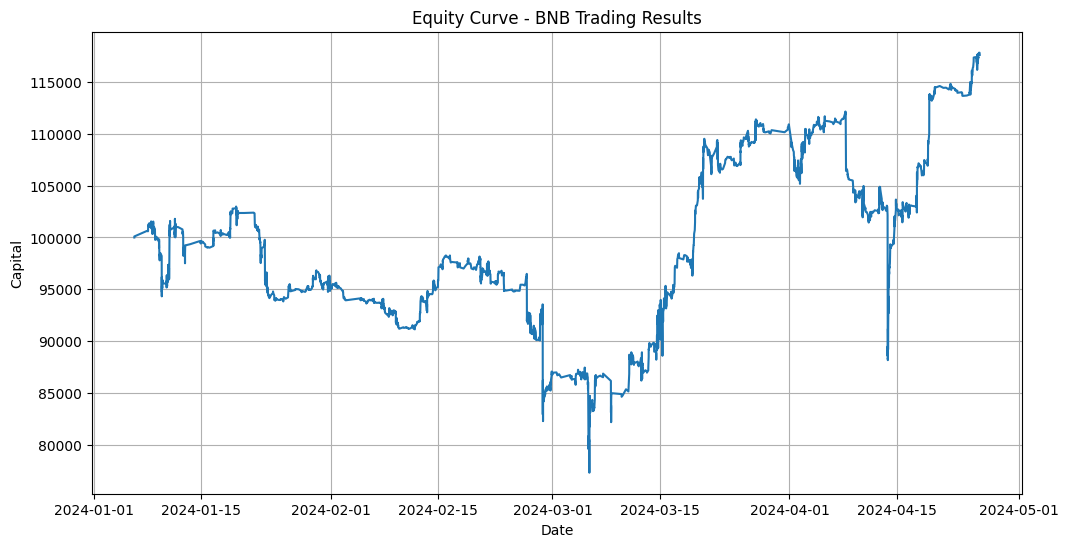

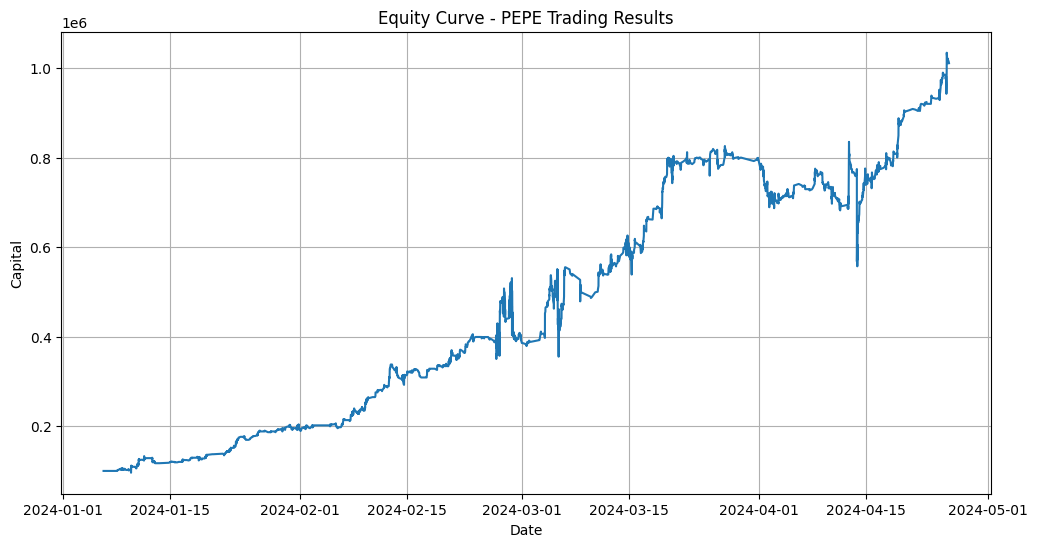

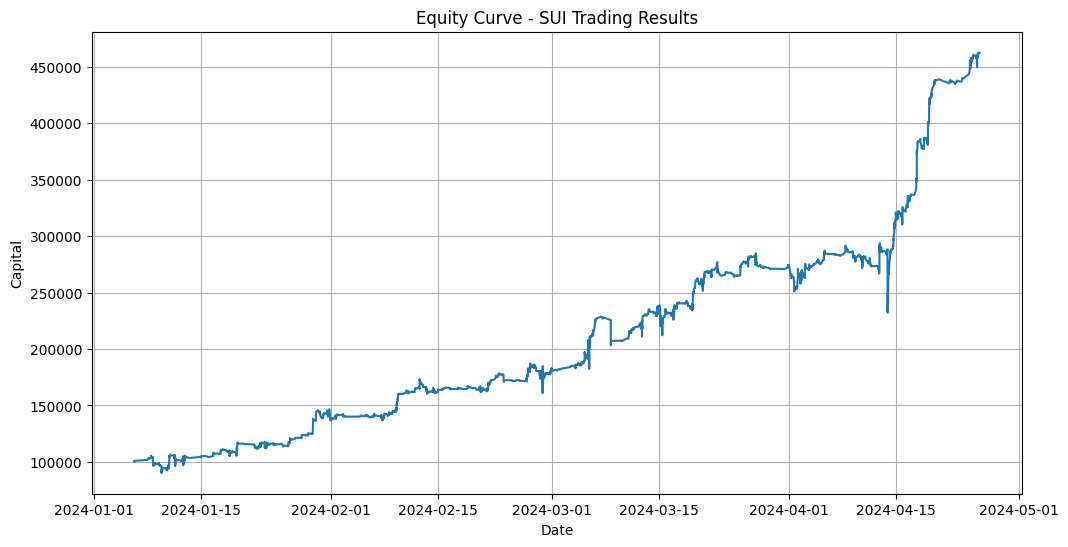


Results for BNB:
Total Trades: 3516
Win Rate: 47.70%
Total Return: 17.63%
Sharpe Ratio: 1.87

Results for PEPE:
Total Trades: 3516
Win Rate: 40.50%
Total Return: 911.43%
Sharpe Ratio: 1750.53

Results for SUI:
Total Trades: 3516
Win Rate: 54.07%
Total Return: 362.30%
Sharpe Ratio: 228.93


In [61]:
# Create dictionary of altcoins
alt_coins = {
    'BNB': bnb_data,
    'PEPE': pepe_data,
    'SUI': sui_data
}

# Run strategy
results = run_strategy(
    btc_data=btc_data,
    alt_coins=alt_coins,
    start_date='2024-01-01',
    end_date='2024-4-26'
)

# Print results
for coin, metrics in results.items():
    print(f"\nResults for {coin}:")
    print(f"Total Trades: {metrics['total_trades']}")
    print(f"Win Rate: {metrics['win_rate']:.2%}")
    print(f"Total Return: {metrics['total_return']:.2f}%")
    print(f"Sharpe Ratio: {metrics['sharpe_ratio']:.2f}")